# CUSTOMER CHURN

#  Import Libraries

In [1]:
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype', 'is_numeric_dtype' to check if the type of input is string and numeric
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import AdaBoostClassifier

from xgboost.sklearn import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 

# suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# Set Options

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 

plt.rcParams['figure.figsize'] = (15,8)

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None


# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# Read Data

In [4]:
# read the csv data file using pandas

df_customer_churn = pd.read_csv(r'G:\Classes\MACHINE LEARNING\IMPORTANT DATASETS\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# display the top 5 rows of the dataframe
df_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models

## Data Type

In [6]:
df_customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# The datatype of "TotalCharges" has changed from "Object" to 'Float64'
df_customer_churn['TotalCharges'] = pd.to_numeric(df_customer_churn['TotalCharges'], errors = 'coerce')

In [8]:
df_customer_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Shape

In [9]:
df_customer_churn.shape

(7043, 21)

In [10]:
df_customer_churn.drop('customerID', axis = 1, inplace = True)

In [11]:
df_customer_churn.shape

(7043, 20)

## Statistical Summary

In [12]:
# the describe() returns the statistical summary of the numerical variables
df_customer_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
# the describe() returns the statistical summary of the categorical variables
df_customer_churn.describe(include = 'O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


##  Distribution of Variables

In [14]:
df_features = df_customer_churn.iloc[:, df_customer_churn.columns != 'Churn']

df_target = df_customer_churn.iloc[:, df_customer_churn.columns == 'Churn']

In [15]:
df_features.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [16]:
df_target.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


## Distribution of Numerical Variables

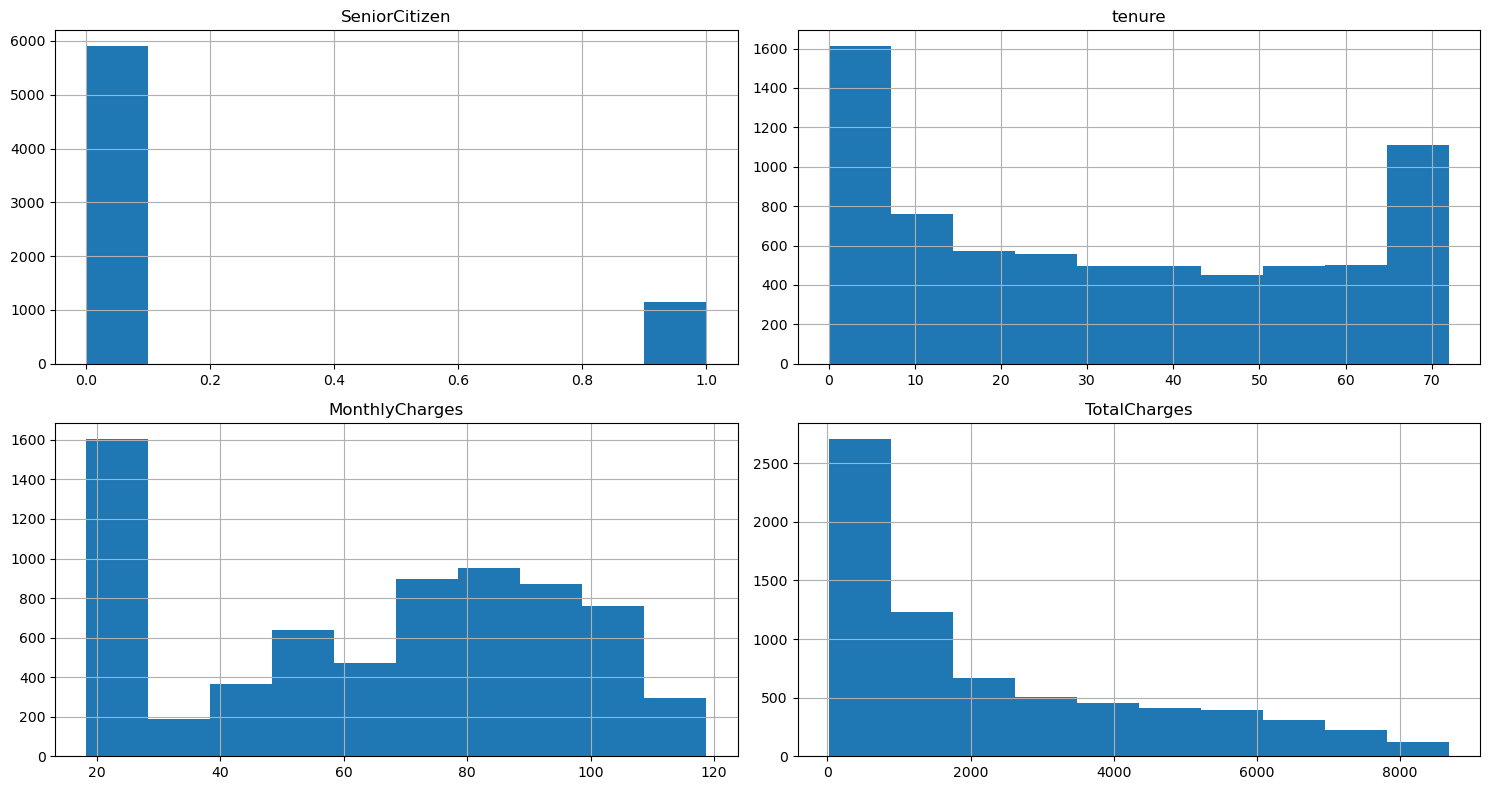

In [17]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

## Distribution of Categorical Variables

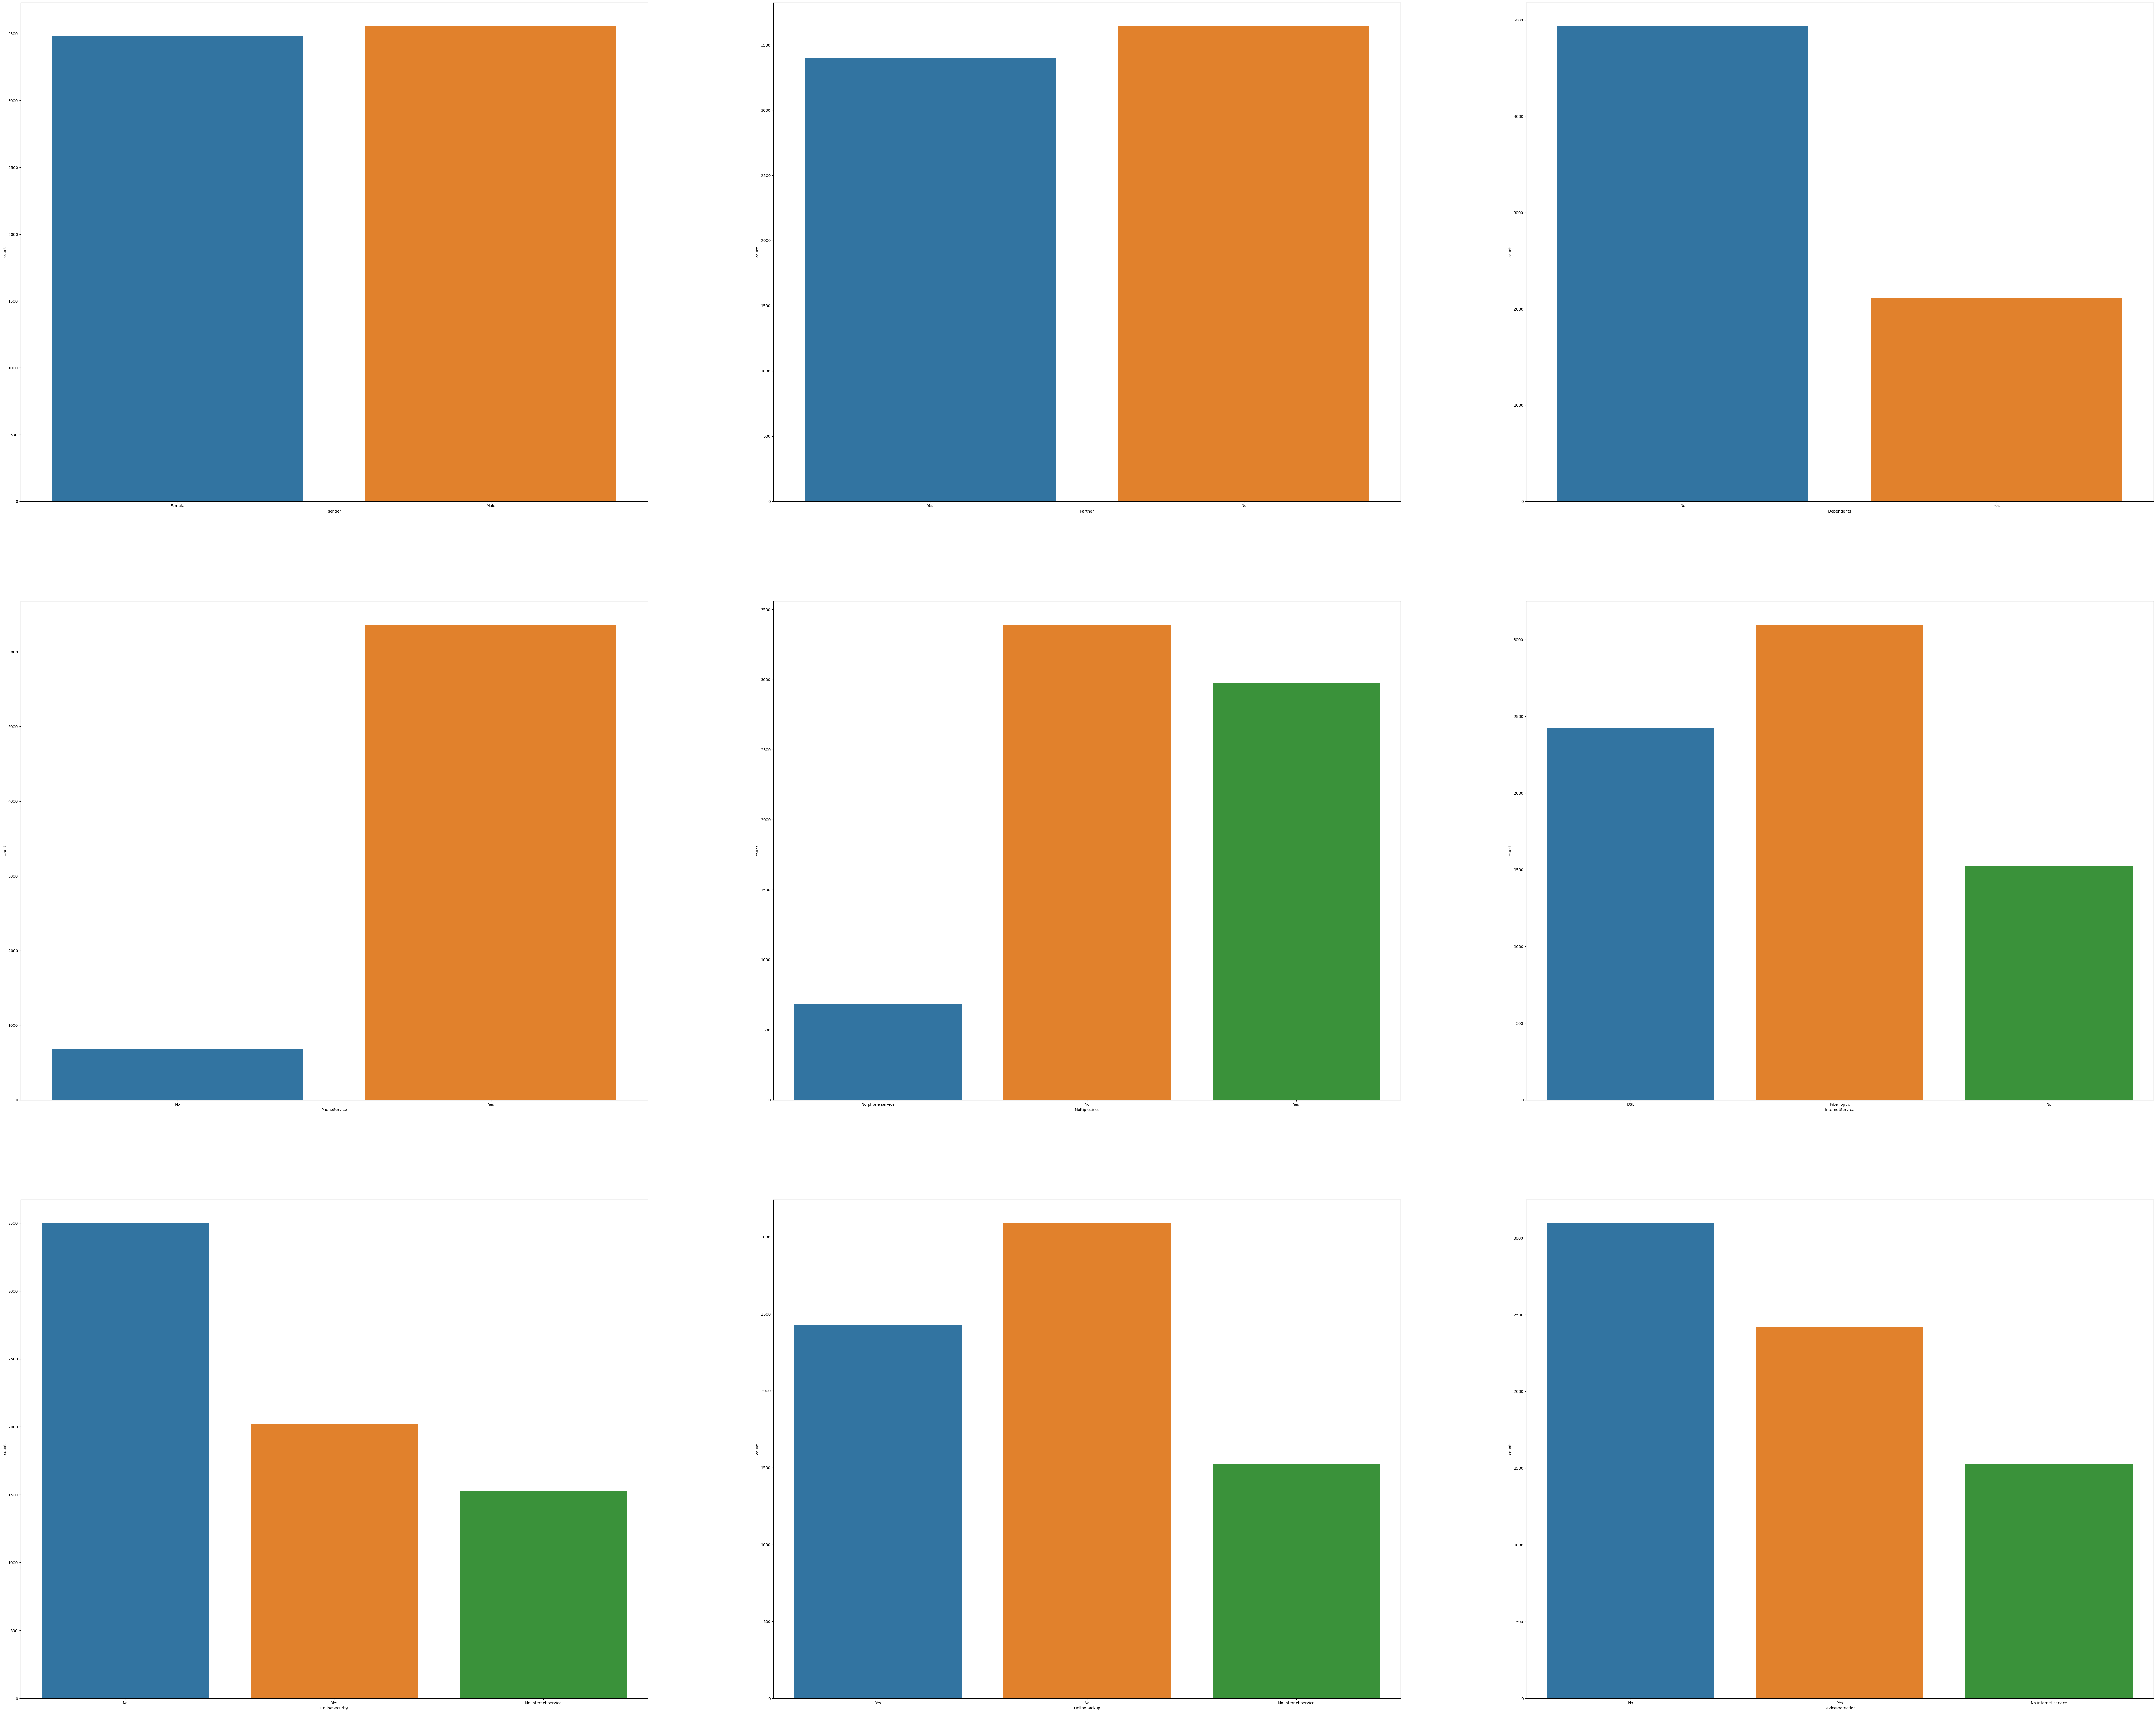

In [18]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical = []

# use for loop to check the data type of each variable
for column in df_features:
    
     # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size        
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (100,80))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(x = df_customer_churn[variable], ax = subplot)

# display the plot    
plt.show()

## Distribution of Dependent Variables

In [19]:
# get counts of 'Yes' and 'No' in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'

class_frequency = df_target.Churn.value_counts()

class_frequency

No     5174
Yes    1869
Name: Churn, dtype: int64

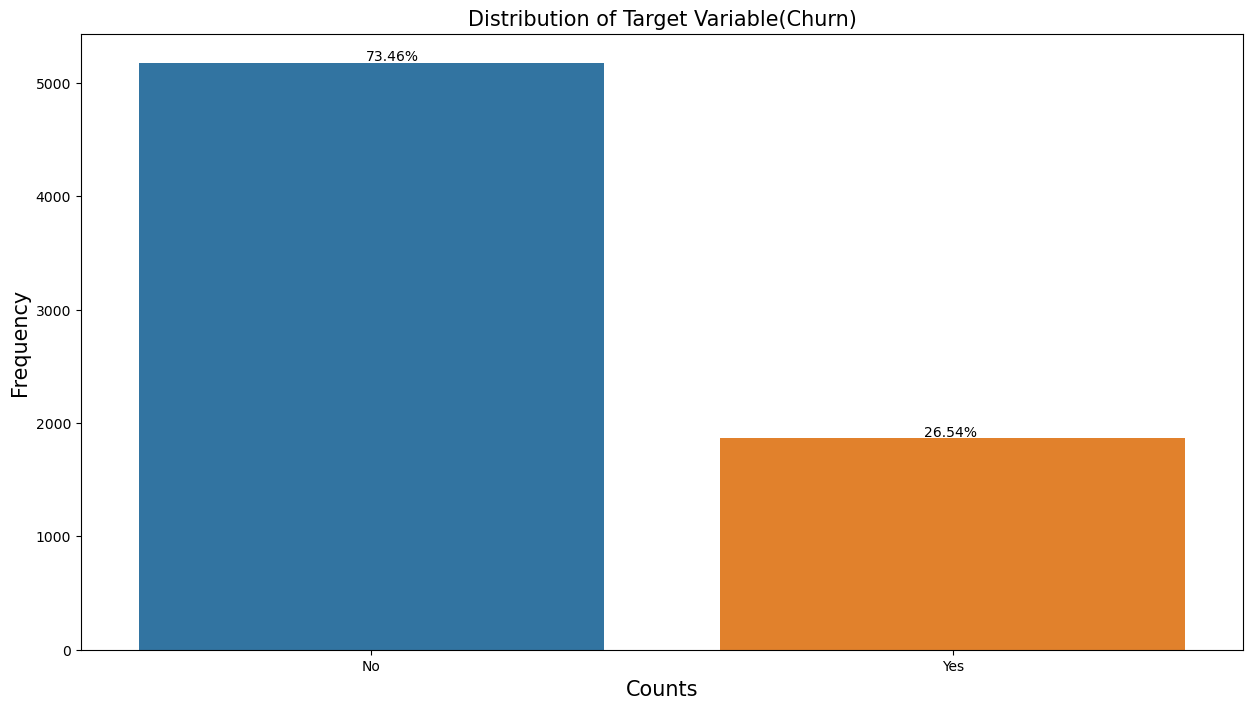

In [20]:
# plot the countplot of the variable 'Churn'
sns.countplot(x = df_target.Churn)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.01, y = df_target.Churn.value_counts()[0] + 20,
        s = str(round((class_frequency[0]) * 100 / len(df_target.Churn), 2)) + '%')

plt.text(x = 0.95, y = df_target.Churn.value_counts()[1] + 10,
        s = str(round((class_frequency[1]) * 100 / len(df_target.Churn), 2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable(Churn)', fontsize = 15)
plt.xlabel('Counts', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# to show the plot
plt.show()

## Correlation

In [21]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_features.corr()

# print the correlation matrix
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


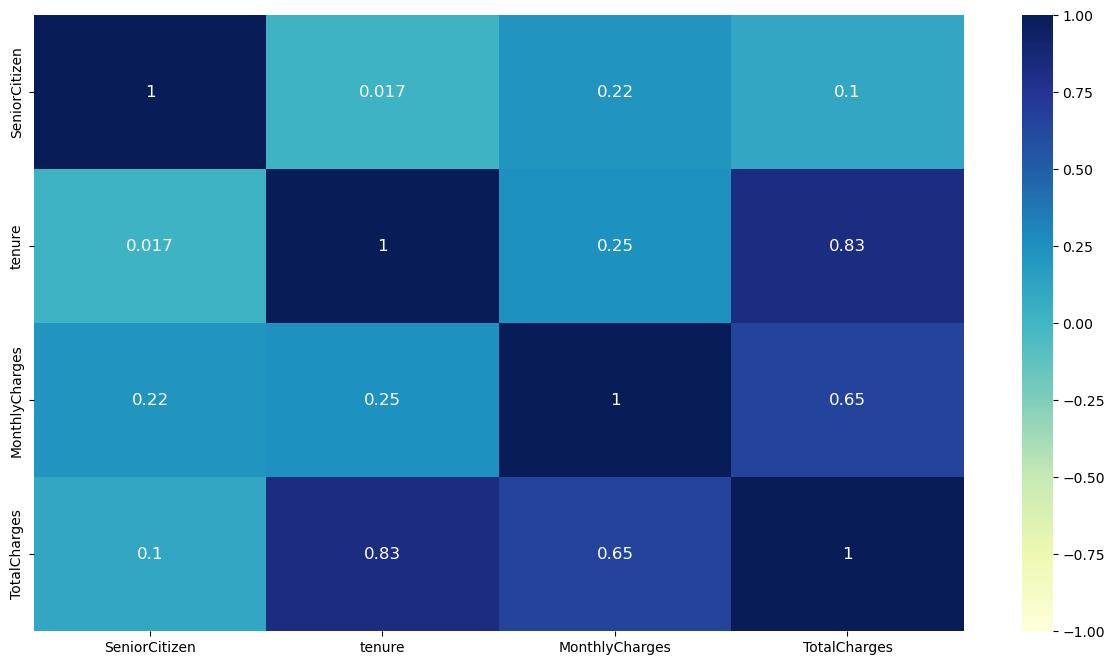

In [22]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot_kws = {'size': 12})

# display the plot
plt.show()

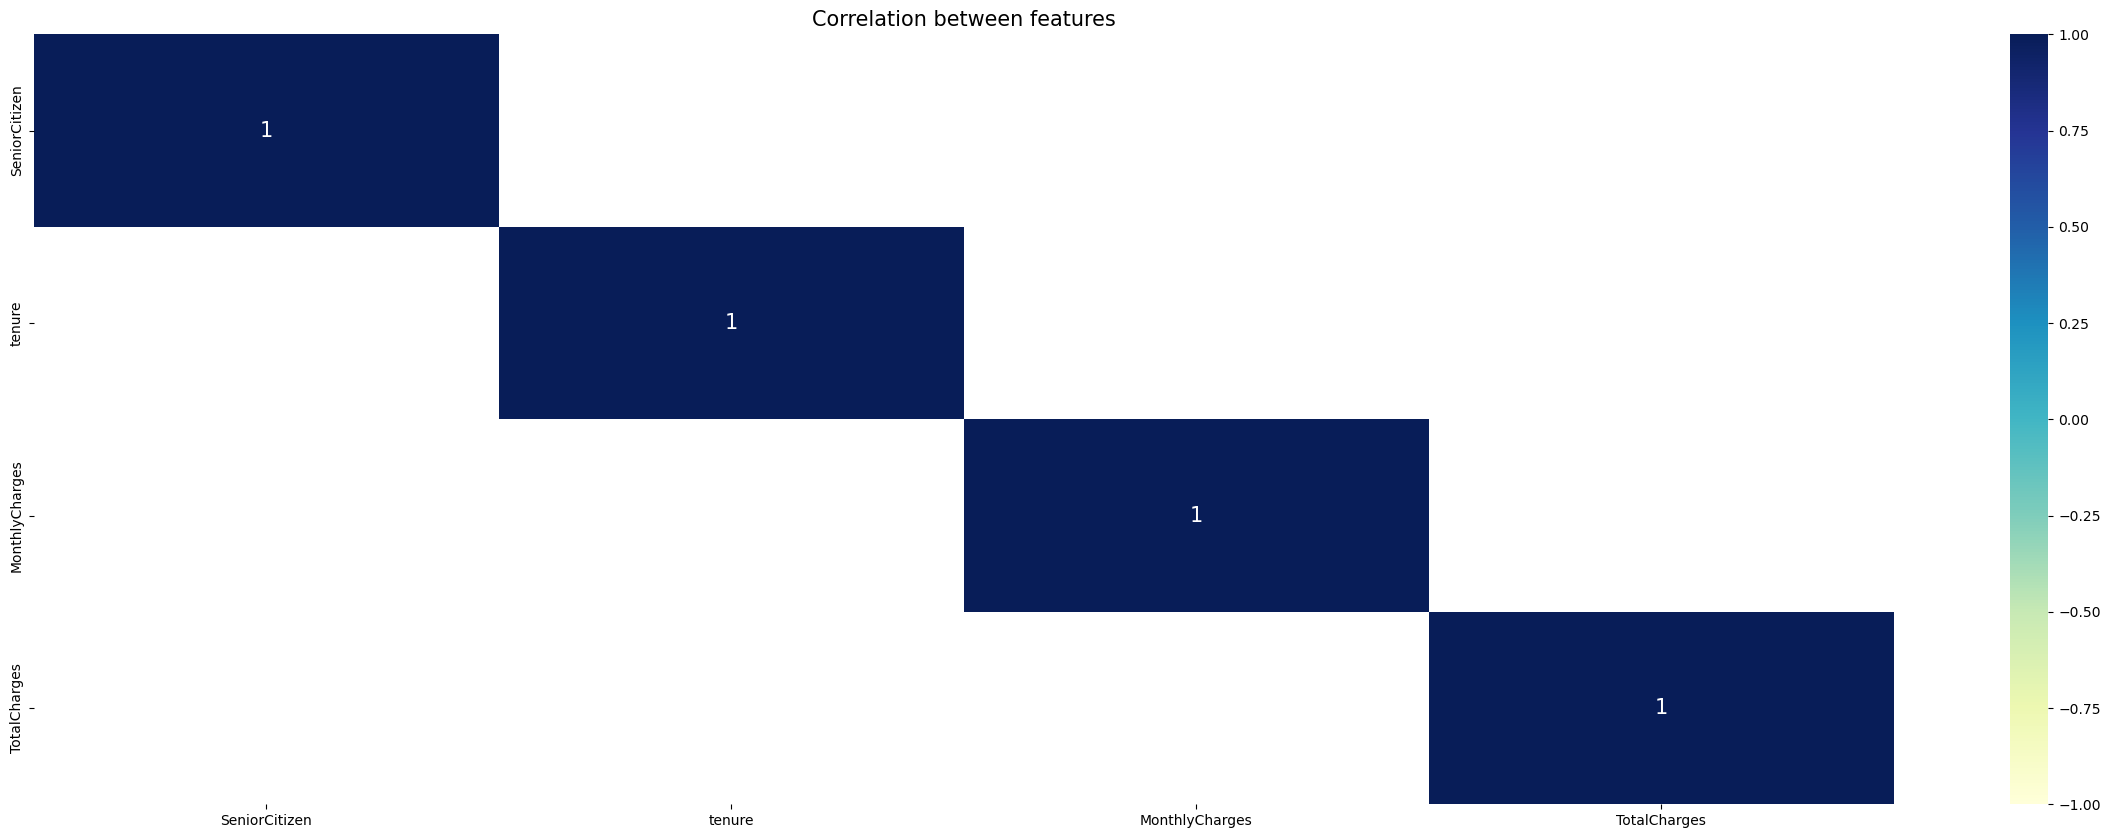

In [23]:
plt.figure(figsize=(30, 10))

sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

## Discovery of Outliers

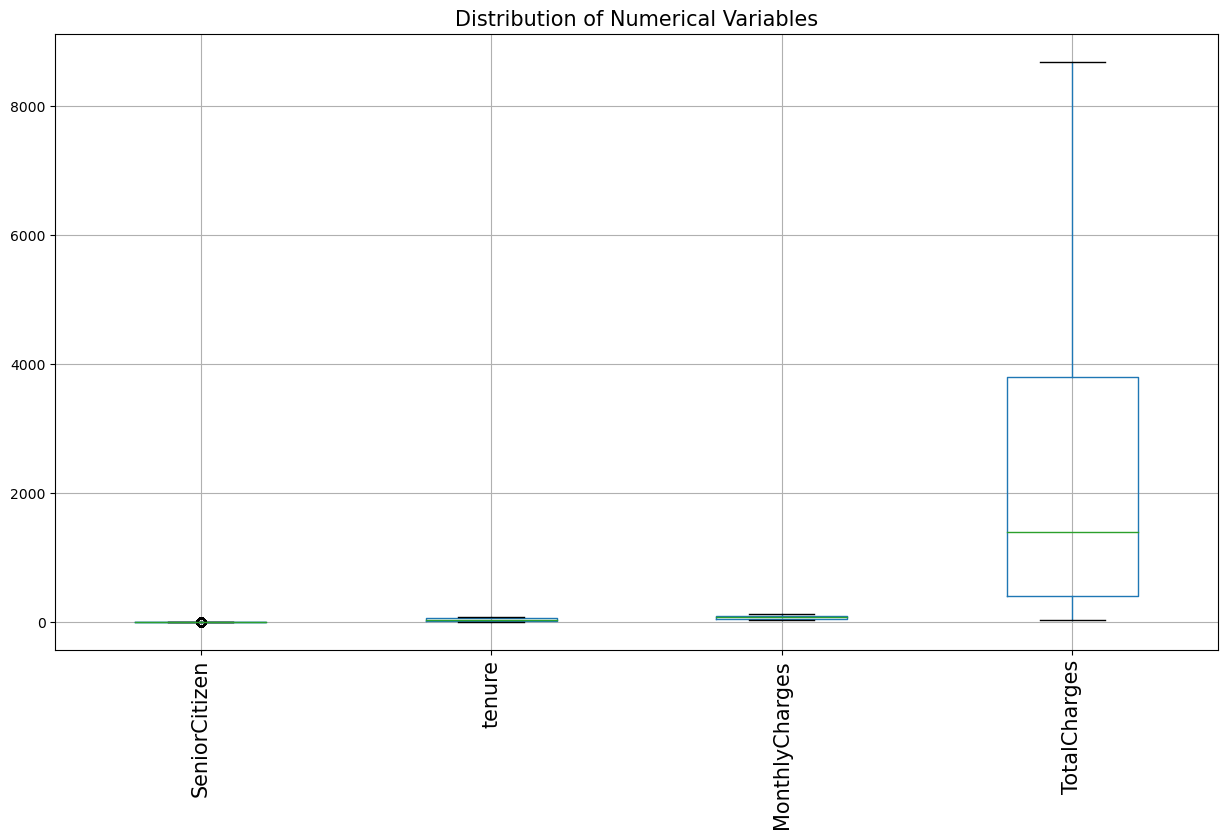

In [24]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Numerical Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [25]:
df_customer_churn.shape

(7043, 20)

## Remove the Outliers using IQR

In [26]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

SeniorCitizen        0.0000
tenure              46.0000
MonthlyCharges      54.3500
TotalCharges      3393.2875
dtype: float64


In [27]:
# remove the outliers from the dataframe 'df_customer'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

df_customer_churn = df_customer_churn[~((df_customer_churn < (Q1 - 1.5 * IQR)) | (df_customer_churn > (Q3 + 1.5 * IQR))).any(axis = 1)]

# reset the index of the dataframe without outliers
df_customer_churn = df_customer_churn.reset_index(drop = True)

In [28]:
df_customer_churn.shape

(5901, 20)

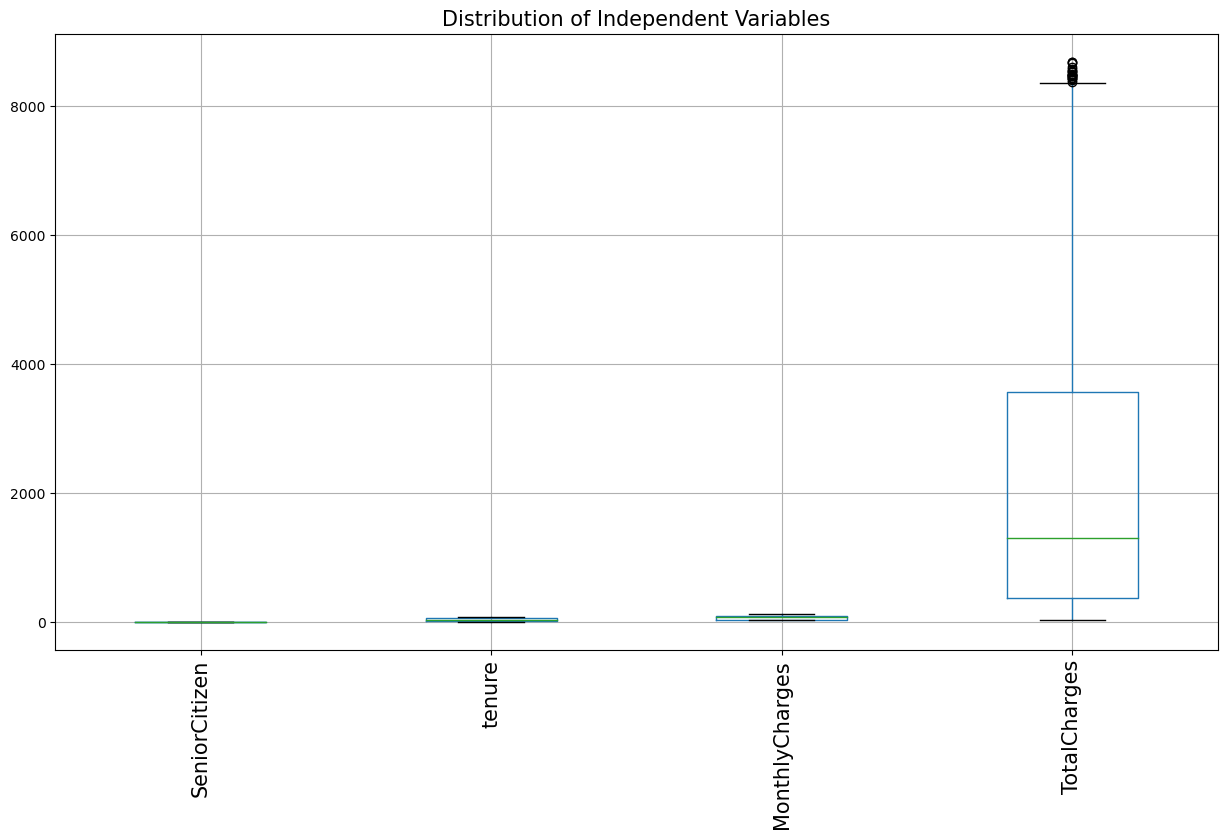

In [29]:
df_customer_churn.boxplot()

plt.title('Distribution of Independent Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

##  Missing Values

In [30]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total_null = df_customer_churn.isnull().sum().sort_values(ascending = False)

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent_null = (df_customer_churn.isnull().sum() * 100 / df_customer_churn.isnull().count()).sort_values(ascending = False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total_null, Percent_null], axis = 1, keys = ['Total Null', 'Percentage of Missing Data'])

# add the column containing data type of each variable
missing_data['Data Type'] = df_customer_churn[missing_data.index].dtypes

missing_data

,Total Null,Percentage of Missing Data,Data Type
TotalCharges,11,0.186409,float64
gender,0,0.000000,object
SeniorCitizen,0,0.000000,int64
MonthlyCharges,0,0.000000,float64
PaymentMethod,0,0.000000,object
PaperlessBilling,0,0.000000,object
Contract,0,0.000000,object
StreamingMovies,0,0.000000,object
StreamingTV,0,0.000000,object
TechSupport,0,0.000000,object


In [31]:
df_customer_churn['TotalCharges'] = df_customer_churn['TotalCharges'].fillna(0)

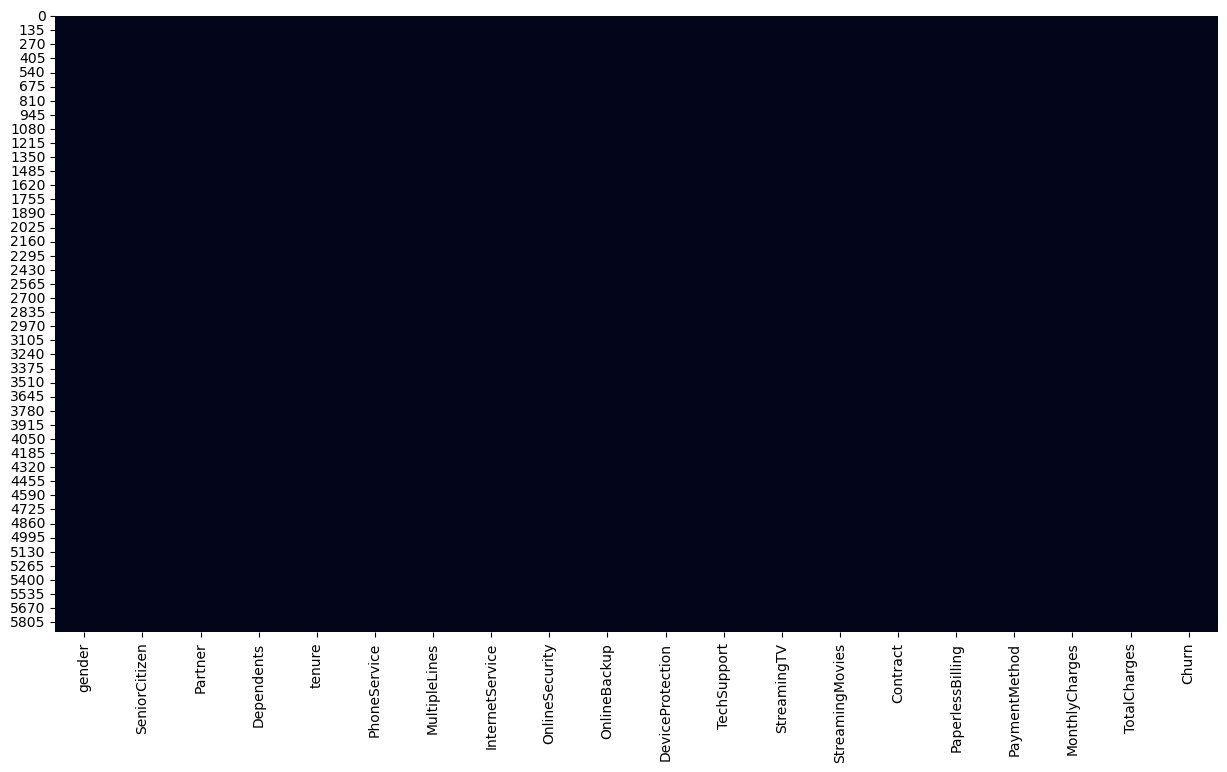

In [32]:
# recheck the null values
# # plot heatmap to check null values

sns.heatmap(df_customer_churn.isnull(), cbar = False)

# display the plot
plt.show()

## Create a generalized function to calculate the metrics for the test set

In [33]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [34]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))
#The kappa statistic is a measure of how closely the instances classified by the machine learning
#classifier matched the data labeled as ground truth, controlling for the accuracy of a random
#classifier as measured by the expected accuracy.
#kappas > 0.75 as excellent, 0.40-0.75 as fair to good, and < 0.40 as poor.

In [35]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'],
                               index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']),
                cbar = False, linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [36]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, _  = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for h1n1_vaccine Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## Create a generalized function to create a dataframe containing the scores for the models

In [37]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy',
#'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

# Prepare the Data

In [38]:
# Checking the dtypes of variables 
df_customer_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Label Encoding Target Variable

In [39]:
# replace 'yes' with one
df_customer_churn['Churn'] = df_customer_churn['Churn'].replace('Yes', 1)

# replace 'no' with zero
df_customer_churn['Churn'] = df_customer_churn['Churn'].replace('No', 0)

##  Filtering Numerical and Categorical variables

In [40]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical = []

# use for loop to check the data type of each variable
for column in df_customer_churn:
    
     # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_customer_churn[column]):
        
          # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

In [41]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_customer_churn[categorical]

# display first five observations of the categorical dataframe
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [42]:
# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_customer_churn.drop(categorical, axis = 1)

# display first five observations of the numeric dataframe
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


## Dummy Encoding Categorical Variables

In [43]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

# display first five observations of the dummy dataframe
df_cat_dummies.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [44]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_customer_churn_dummy = pd.concat([df_num, df_cat_dummies], axis = 1)

# display first five observations of the dummy dataframe
df_customer_churn_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


#  Logistic Regression

In [45]:
# use 'drop()' to remove the variable 'Churn' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_customer_churn_dummy.drop('Churn', axis = 1)

In [46]:
# select only the target variable 'Churn'
y = df_customer_churn_dummy['Churn']

In [47]:
# check the first five observations of X
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [48]:
# check the first five observations of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [49]:
# add the intercept column using 'add_constant()
x = sm.add_constant(x)

# print the first five oservations after adding intercept
x.head()

,const,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1.0,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1.0,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [50]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (4720, 31)
X_test (1181, 31)
Y_train (4720,)
Y_test (1181,)


In [51]:
# instantiate the 'LogisticRegression' to build model using log_reg_mode
log_reg_mod = LogisticRegression()

# fit the model on  training data
log_reg_mod.fit(x_train, y_train)

LogisticRegression()

In [52]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = log_reg_mod.predict_proba(x_test)[:,1]

In [53]:
# use predict() to predict the class labels of target variable
y_pred = log_reg_mod.predict(x_test)

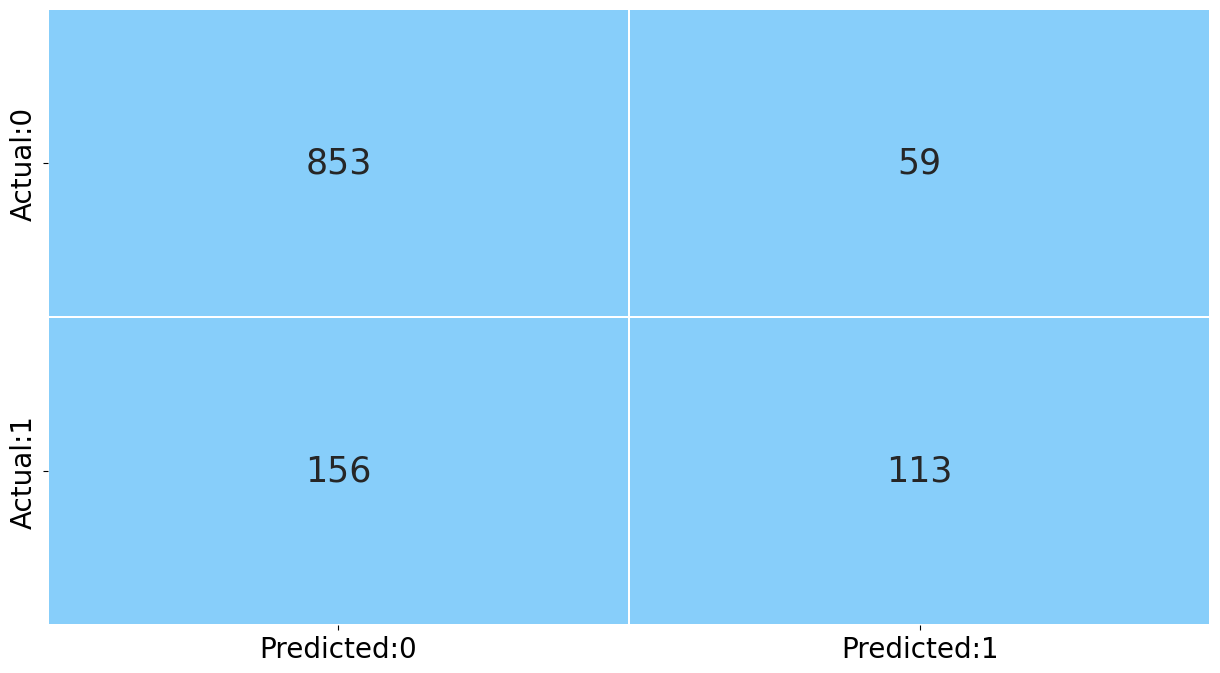

In [54]:
# call the function to plot the confusion matrix
# pass the logistic regression (log_reg_mod) model to the function
plot_confusion_matrix(log_reg_mod)

In [55]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (log_reg_mod) model to the function
test_report = get_test_report(log_reg_mod)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       912
           1       0.66      0.42      0.51       269

    accuracy                           0.82      1181
   macro avg       0.75      0.68      0.70      1181
weighted avg       0.80      0.82      0.80      1181



In [56]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (log_reg_mod) model to the function
kappa_value = kappa_score(log_reg_mod)

# print the kappa value
print(kappa_value)

0.4071354355160699


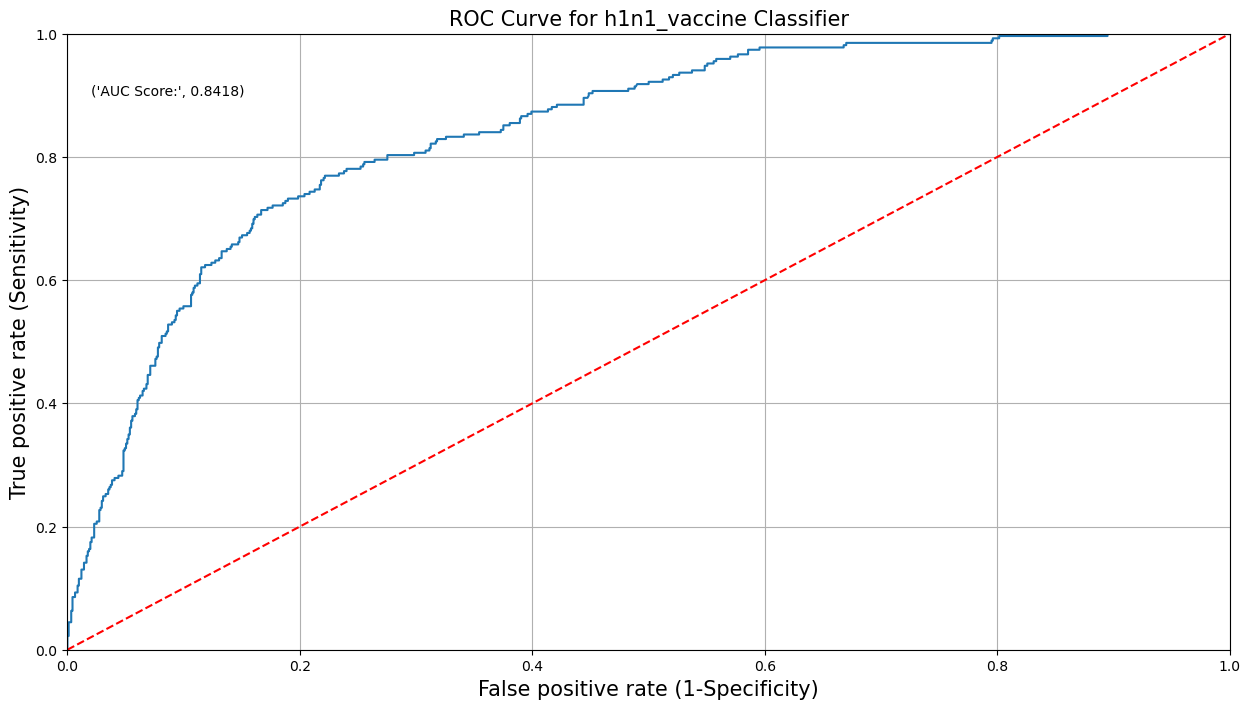

In [57]:
#call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (log_reg_model) model to the function
plot_roc(log_reg_mod)

In [58]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression' as model name to the function
update_score_card(model_name = 'Logistic Regression')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472


# Logistic Regression (using SGD)

In [59]:
scale = StandardScaler()

scale.fit(df_customer_churn_dummy)

StandardScaler()

In [60]:
# use 'drop()' to remove the variable 'Churn' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_customer_churn_dummy.drop('Churn', axis = 1)

In [61]:
# select only the target variable 'Churn'
y = df_customer_churn_dummy['Churn']

In [62]:
x = sm.add_constant(x)

In [63]:
# check the first five observations of X
x.head()

,const,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1.0,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1.0,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.0,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1.0,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [64]:
# check the first five observations of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [65]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (4720, 31)
X_test (1181, 31)
Y_train (4720,)
Y_test (1181,)


In [66]:
# instantiate the 'SGDClassifier' to build model using SGD
# to perform logistic regression, consider the log-loss function 
# set 'random_state' to generate the same dataset each time you run the code 
SGD = SGDClassifier(loss = 'log', random_state = 10)

# The 'log' loss gives logistic regression, a probabilistic  
# fit the model on scaled training data
logreg_with_SGD = SGD.fit(x_train, y_train)

In [67]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = logreg_with_SGD.predict_proba(x_test)[:,1]

In [68]:
# use predict() to predict the class labels of target variable
y_pred = logreg_with_SGD.predict(x_test)

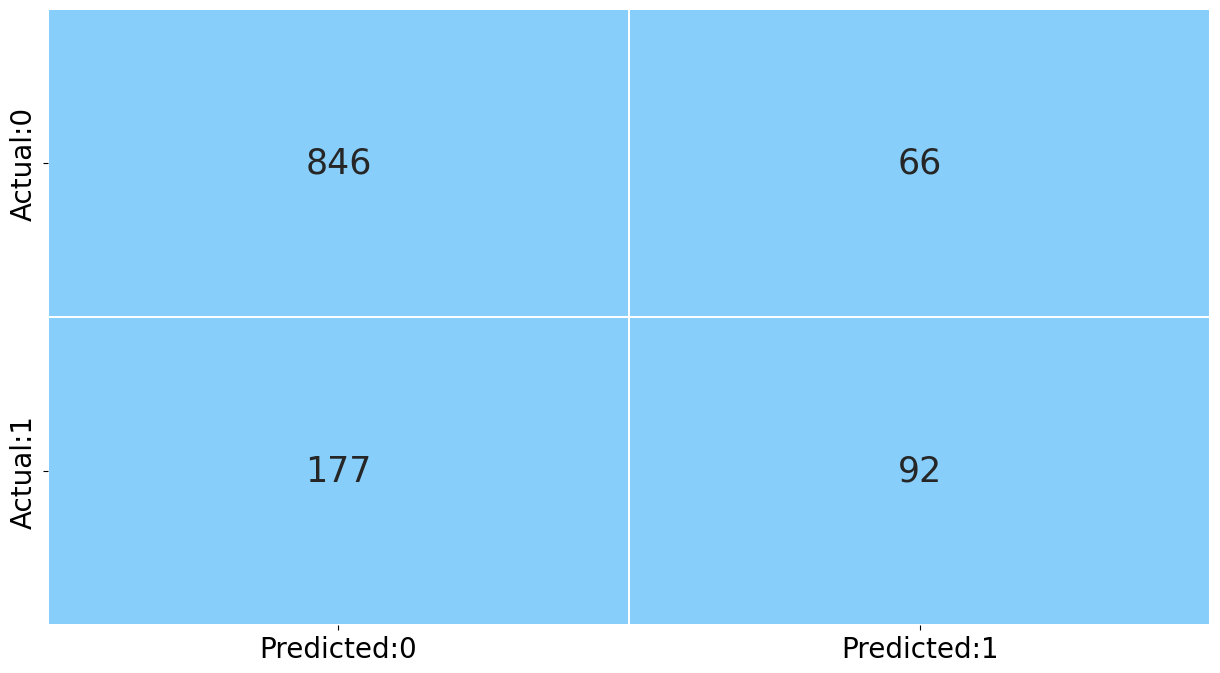

In [69]:
# call the function to plot the confusion matrix
# pass the logistic regression (SGD) model to the function
plot_confusion_matrix(logreg_with_SGD)

In [70]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the logstic regression (SGD) model to the function
test_report = get_test_report(logreg_with_SGD)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       912
           1       0.58      0.34      0.43       269

    accuracy                           0.79      1181
   macro avg       0.70      0.63      0.65      1181
weighted avg       0.77      0.79      0.77      1181



In [71]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the logstic regression (SGD) model to the function
kappa_value = kappa_score(logreg_with_SGD)

# print the kappa value
print(kappa_value)

0.315538669585936


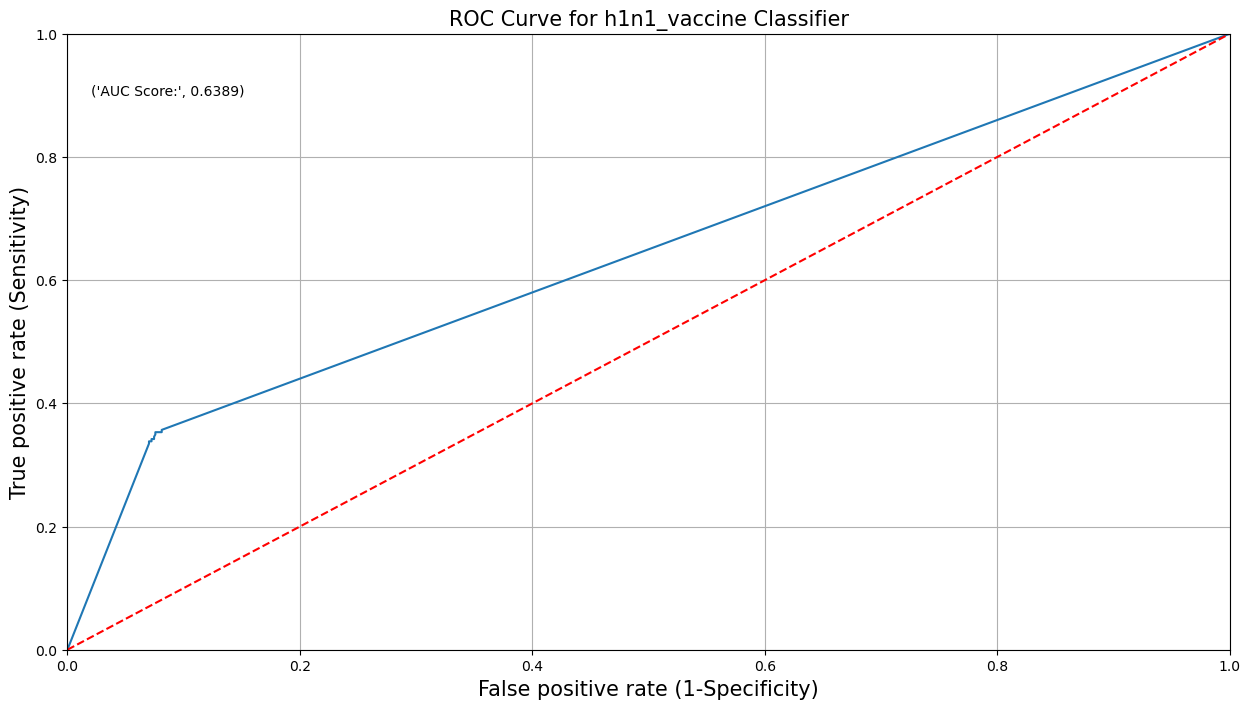

In [72]:
# call the function 'plot_roc' to plot the ROC curve
# pass the logstic regression (SGD) model to the function
plot_roc(logreg_with_SGD)

In [73]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Logistic Regression (SGD)' as model name to the function
update_score_card(model_name = 'Logistic Regression (SGD)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913


# Decison Tree

Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller and smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision

In [74]:
# use 'drop()' to remove the variable 'Churn' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
x = df_customer_churn_dummy.drop('Churn', axis = 1)

In [75]:
# select only the target variable 'Churn'
y = df_customer_churn_dummy['Churn']

In [76]:
# print the first five oservations of Independent Variables
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [77]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
print('X_train', x_train.shape)
print('X_test', x_test.shape)
print('Y_train', y_train.shape)
print('Y_test', y_test.shape)

X_train (4720, 30)
X_test (1181, 30)
Y_train (4720,)
Y_test (1181,)


In [78]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_mod = decision_tree.fit(x_train, y_train)

In [79]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_mod.predict_proba(x_test)[:, 1]

y_pred_prob

array([1., 0., 0., ..., 0., 1., 1.])

In [80]:
# predict the class labels using 'X_test'
y_pred = decision_tree_mod.predict(x_test)

y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

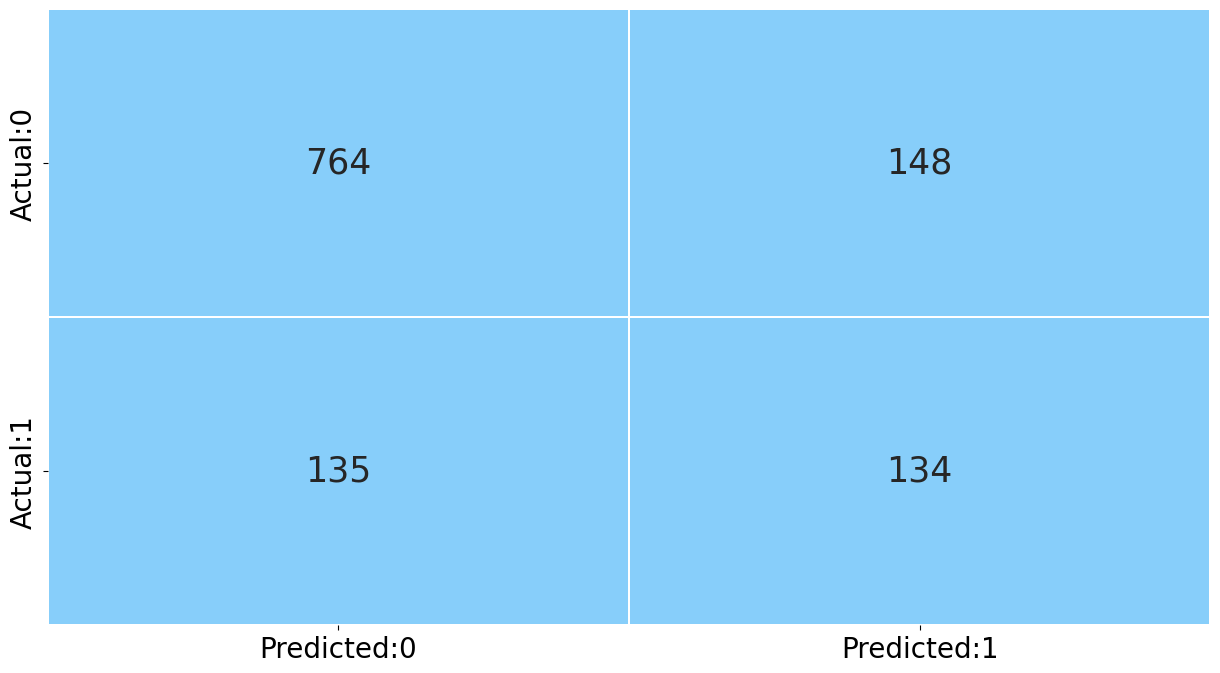

In [81]:
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(decision_tree_mod)

In [82]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_mod)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       912
           1       0.48      0.50      0.49       269

    accuracy                           0.76      1181
   macro avg       0.66      0.67      0.67      1181
weighted avg       0.76      0.76      0.76      1181



In [83]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_mod)

# print the kappa value
print(kappa_value)

0.33023456208731206


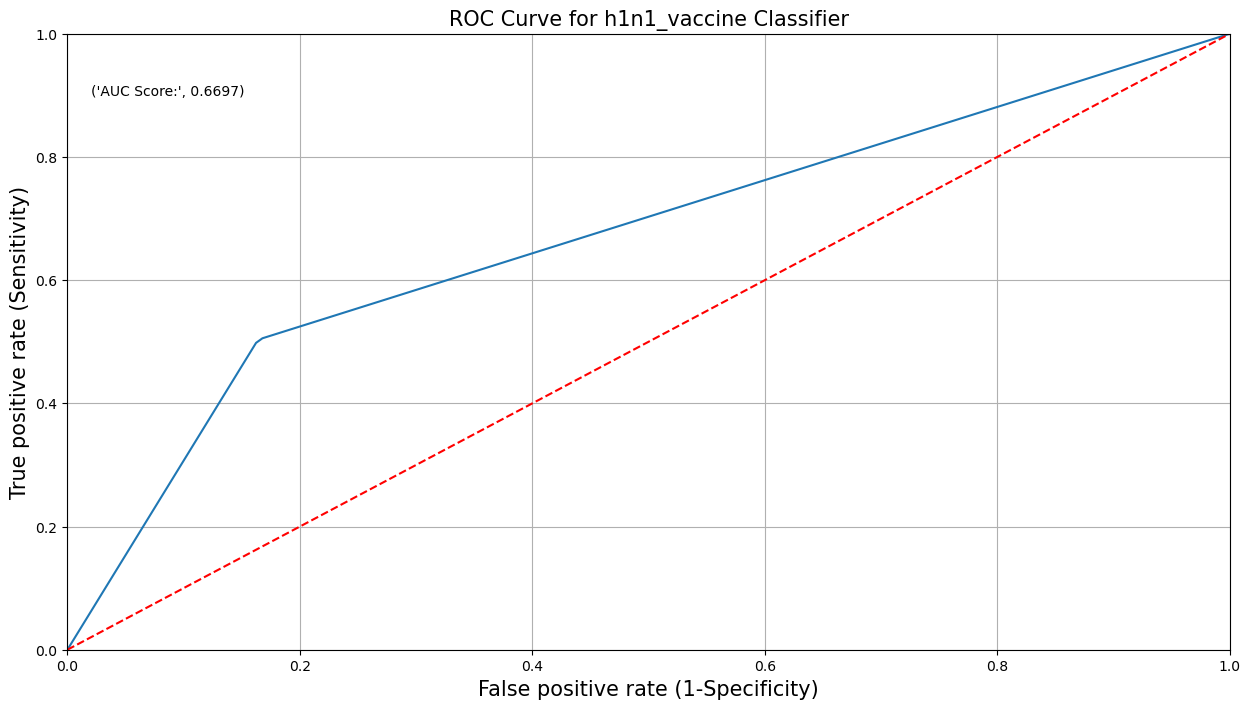

In [84]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree_mod)

In [85]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388


# Prune a Decision Tree

Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.

In [86]:
# instantiate the 'DecisionTreeClassifier' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 25, random_state = 1)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(x_train, y_train)

In [87]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_prune.predict_proba(x_test)[:,1]

In [88]:
# predict the class labels using 'X_test'
y_pred = decision_tree_prune.predict(x_test)

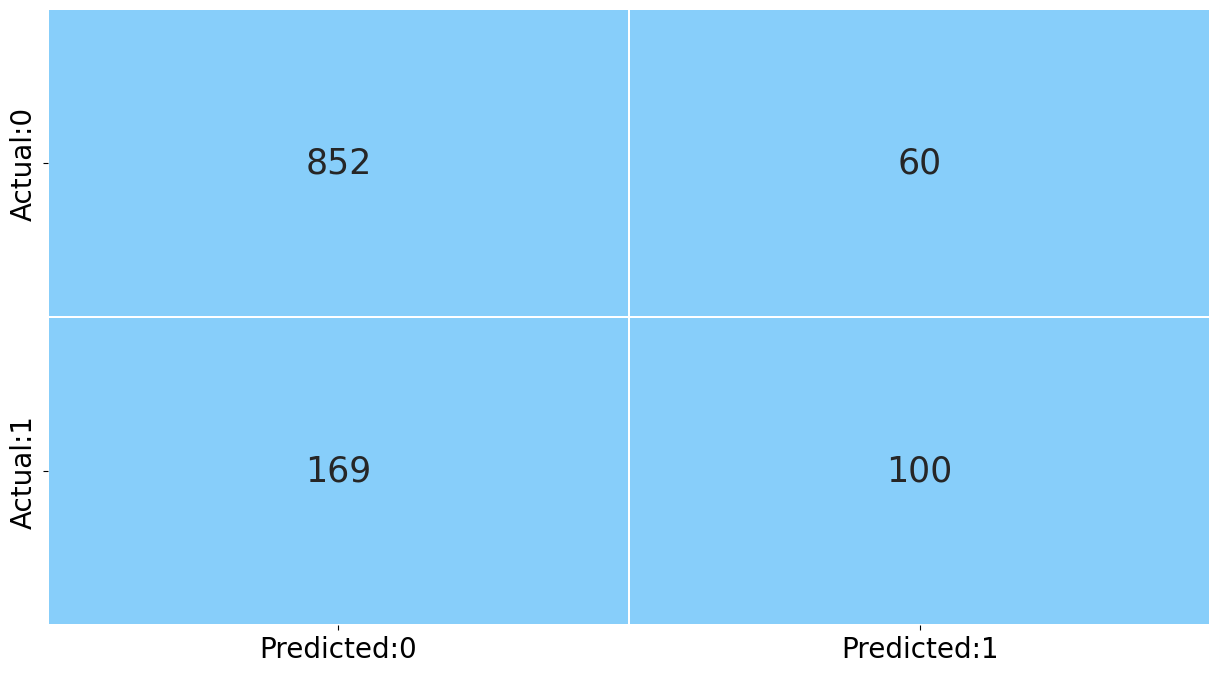

In [89]:
# call the function to plot the confusion matrix
# pass the decision tree (pruned) model to the function
plot_confusion_matrix(decision_tree_prune)

In [90]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (pruned) model to the function
test_report = get_test_report(decision_tree_prune)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       912
           1       0.62      0.37      0.47       269

    accuracy                           0.81      1181
   macro avg       0.73      0.65      0.67      1181
weighted avg       0.79      0.81      0.79      1181



In [91]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (pruned) model to the function
kappa_value = kappa_score(decision_tree_prune)

# print the kappa value
print(kappa_value)

0.3569449959459684


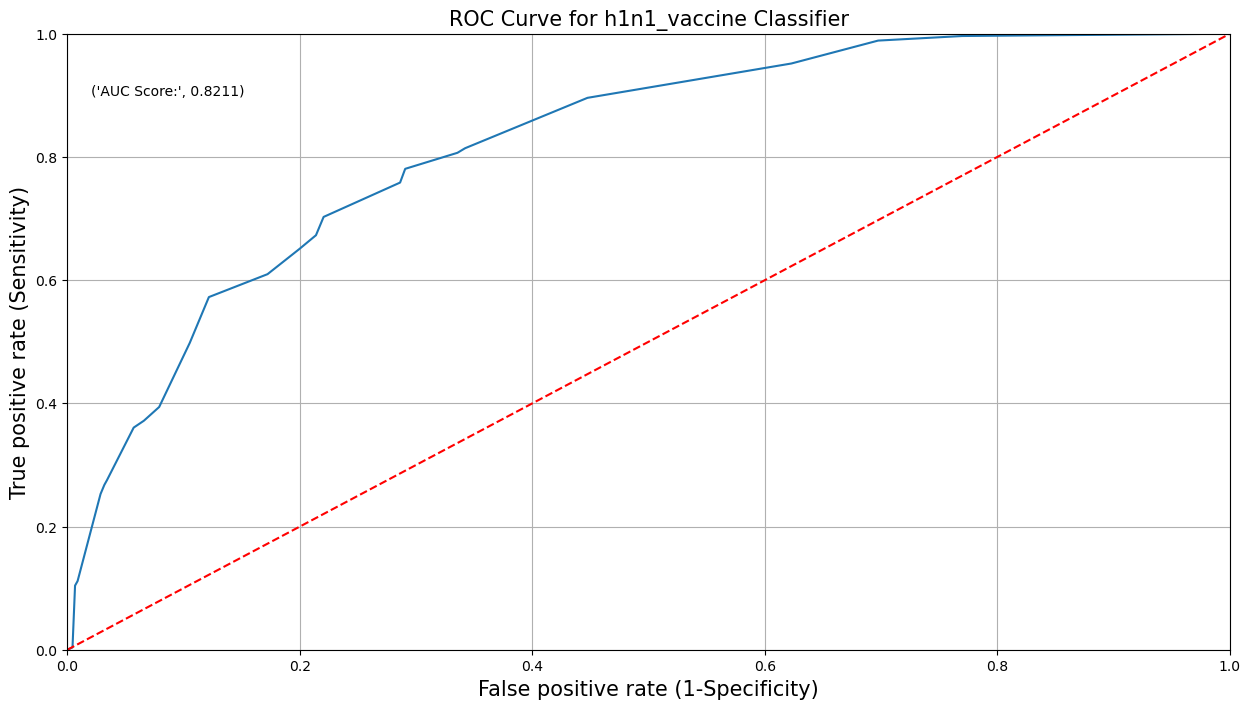

In [92]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (pruned) model to the function
plot_roc(decision_tree_prune)

In [93]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (Pruned)' as model name to the function
update_score_card(model_name = 'Decision Tree (Prune)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200


# Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.
The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

In [94]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [95]:
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 1)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(x_train, y_train)

# get the best parameters
print('Best Parameters for decision tree classifier : ',dt_grid.best_params_, '\n')

Best Parameters for decision tree classifier :  {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 5, 'min_samples_leaf': 15, 'min_samples_split': 10} 



In [96]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)


# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(x_train, y_train)

In [97]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = dt_grid_model.predict_proba(x_test)[:,1]

In [98]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(x_test)

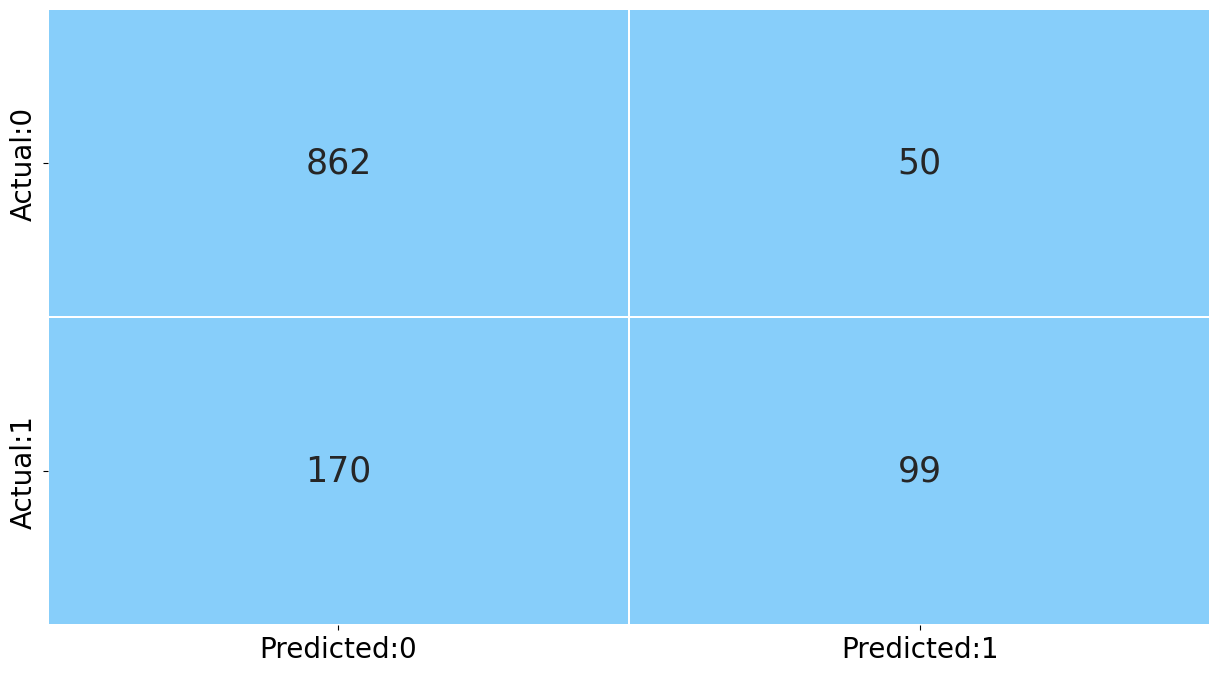

In [99]:
# call the function to plot the confusion matrix
# pass the decision tree (GridSearchCV) model to the function
plot_confusion_matrix(dt_grid_model)

In [100]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (GridSearchCV) model to the function
test_report = get_test_report(dt_grid_model)


# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       912
           1       0.66      0.37      0.47       269

    accuracy                           0.81      1181
   macro avg       0.75      0.66      0.68      1181
weighted avg       0.80      0.81      0.79      1181



In [101]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (GridSearchCV) model to the function
kappa_value = kappa_score(dt_grid_model)

# print the kappa value
print(kappa_value)

0.3716505117340917


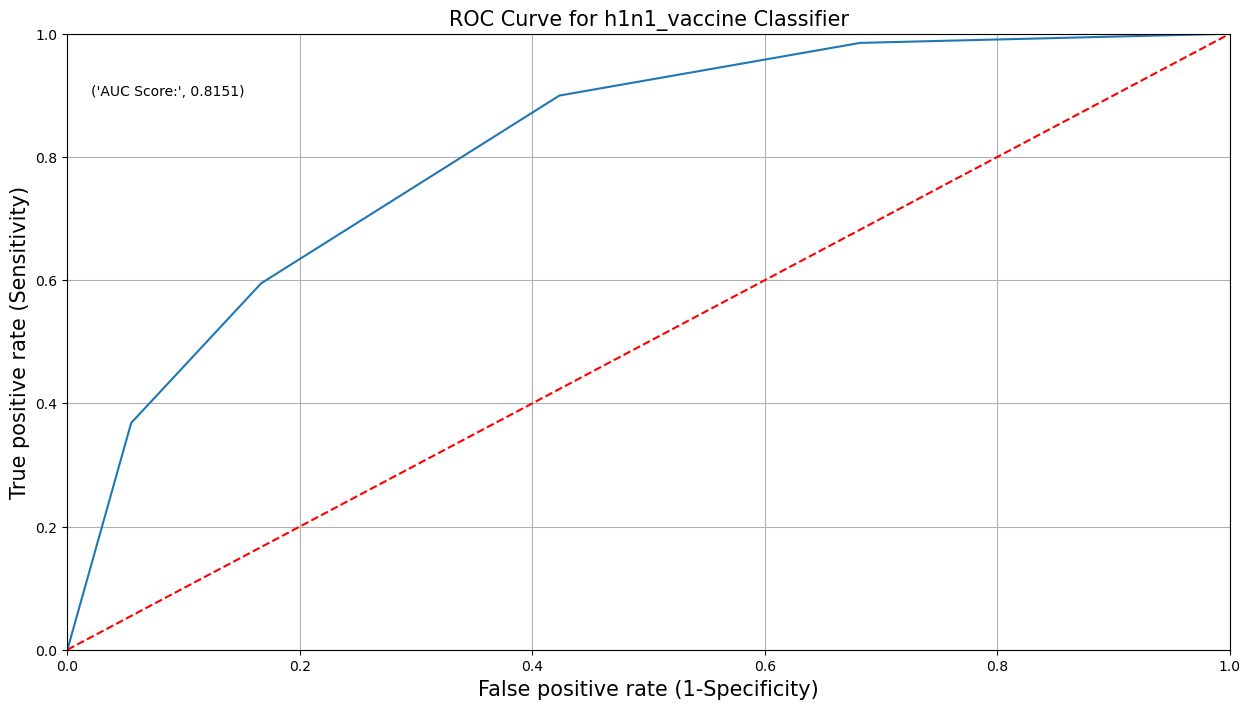

In [102]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (GridSearchCV) model to the function
plot_roc(dt_grid_model)

In [103]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (GridSearchCV)' as model name to the function
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684


# Support Vector Machine

## Support Vector Machine using Linear Kernal

In [104]:
# build the model
svclassifier = SVC(kernel = 'linear')

# fit the model
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [105]:
# predict the class labels using 'X_test'
y_pred =svclassifier.predict(x_test)

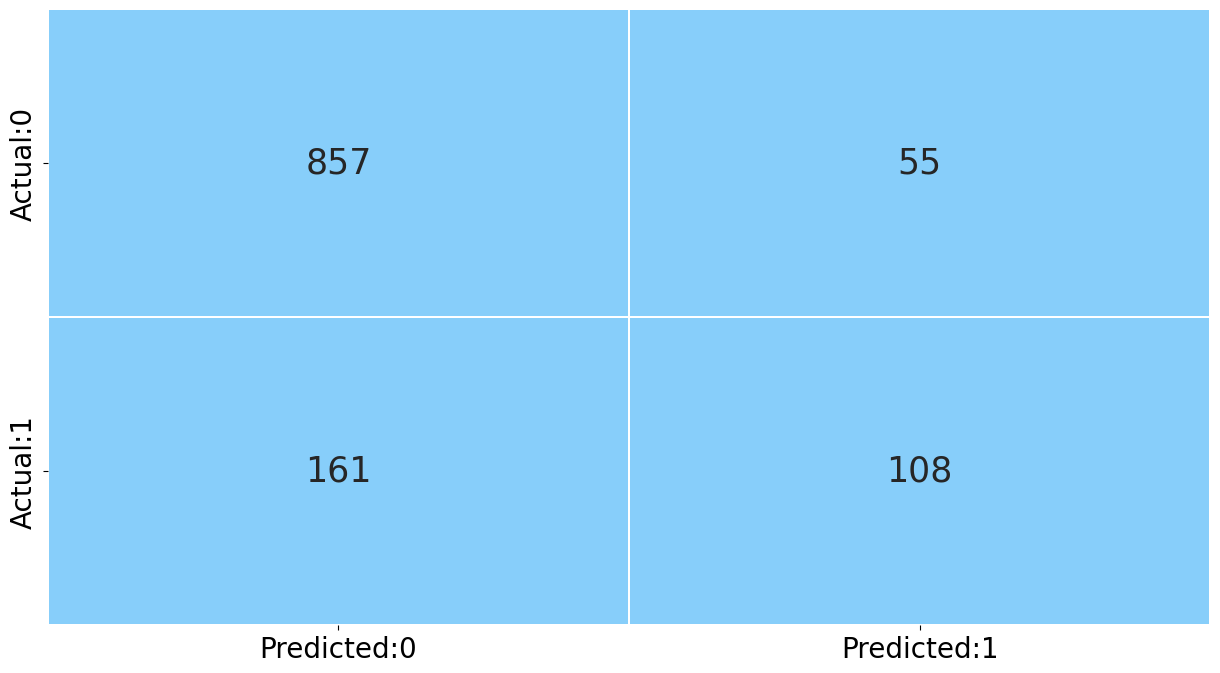

In [106]:
# call the function to plot the confusion matrix
# pass the 'svclassifier' model to the function
plot_confusion_matrix(svclassifier)

In [107]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the 'svclassifier' to the function
test_report = get_test_report(svclassifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       912
           1       0.66      0.40      0.50       269

    accuracy                           0.82      1181
   macro avg       0.75      0.67      0.69      1181
weighted avg       0.80      0.82      0.80      1181



In [108]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the 'svclassifier' to the function
kappa_value = kappa_score(svclassifier)

# print the kappa value
print(kappa_value)

0.3962196270751578


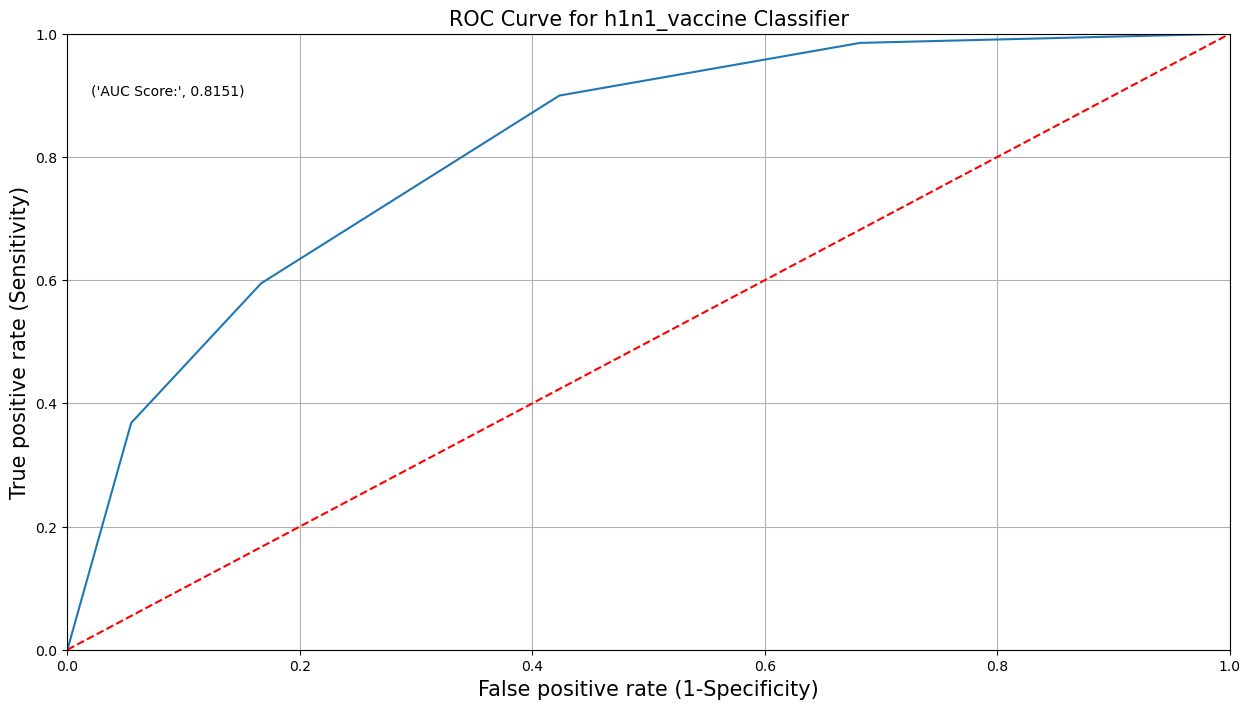

In [109]:
# call the function 'plot_roc' to plot the ROC curve
# pass the 'svclassifier' to the function
plot_roc(svclassifier)

In [110]:
# use the function 'update_score_card' to store the performance measures
# pass the 'svclassifier' as model name to the function
update_score_card(model_name = 'SV Classifier (Linear)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000


## Support Vector Machine using Gaussian Kernal

In [111]:
# build the model
svclassifier = SVC(kernel='rbf')
# fit the model
svclassifier.fit(x_train, y_train)

SVC()

In [112]:
# predict the class labels using 'X_test'
y_pred =svclassifier.predict(x_test)

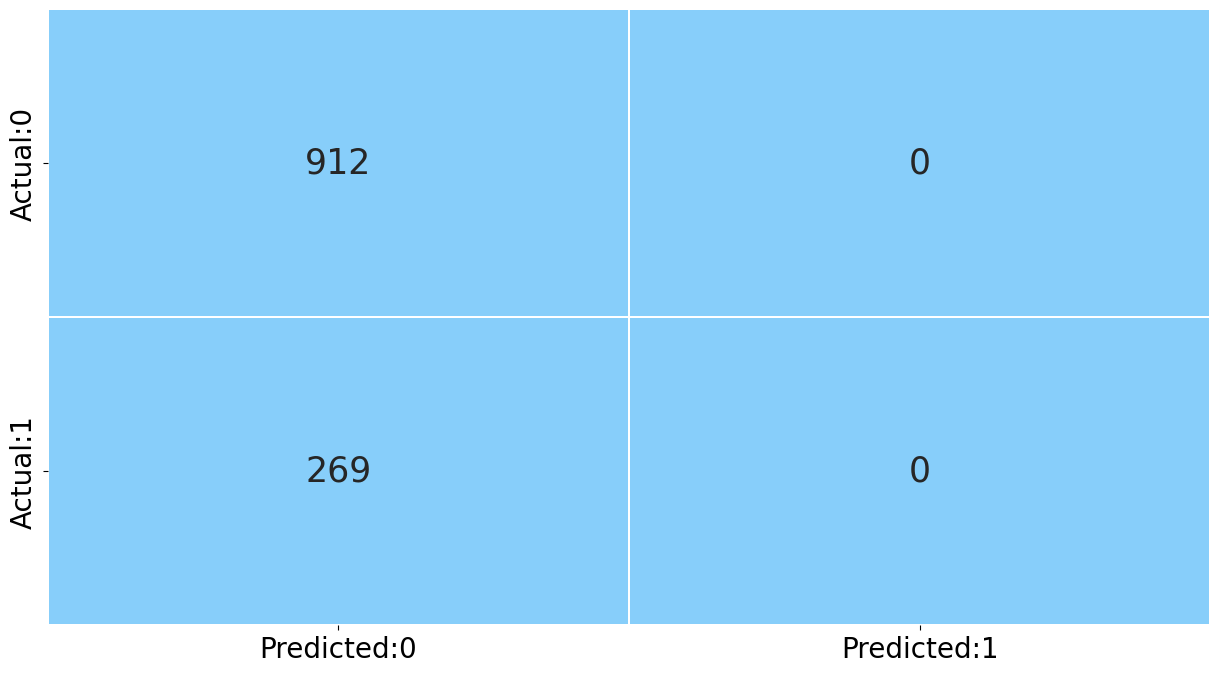

In [113]:
# call the function to plot the confusion matrix
# pass the 'svclassifier' model to the function
plot_confusion_matrix(svclassifier)

In [114]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the 'svclassifier' to the function
test_report = get_test_report(svclassifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       912
           1       0.00      0.00      0.00       269

    accuracy                           0.77      1181
   macro avg       0.39      0.50      0.44      1181
weighted avg       0.60      0.77      0.67      1181



In [115]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the 'svclassifier' to the function
kappa_value = kappa_score(svclassifier)

# print the kappa value
print(kappa_value)

0.0


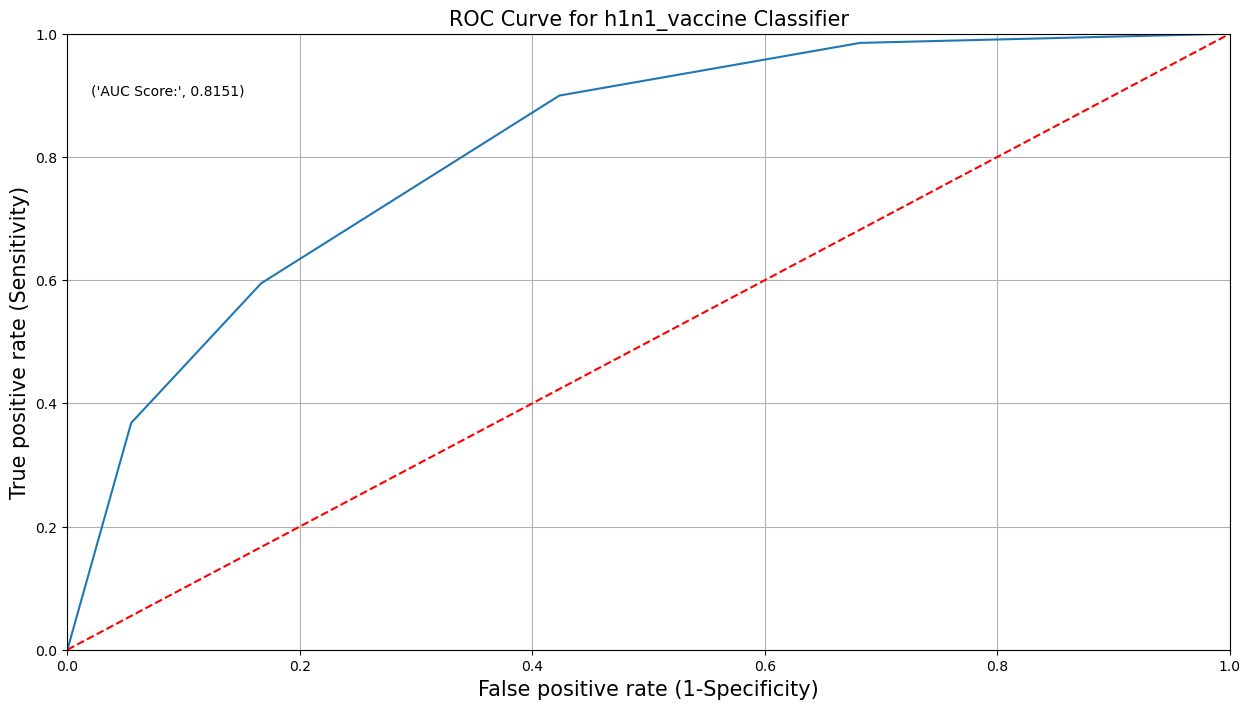

In [116]:
# call the function 'plot_roc' to plot the ROC curve
# pass the 'svclassifier' to the function
plot_roc(svclassifier)

In [117]:
# use the function 'update_score_card' to store the performance measures
# pass the 'svclassifier' as model name to the function
update_score_card(model_name = 'SV Classifier (Gaussian Kernal)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000


## Support Vector Machine using Sigmoid Kernal

In [118]:
# build the model
svclassifier = SVC(kernel='sigmoid')
# fit the model
svclassifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [119]:
y_pred  = svclassifier.predict(x_test)

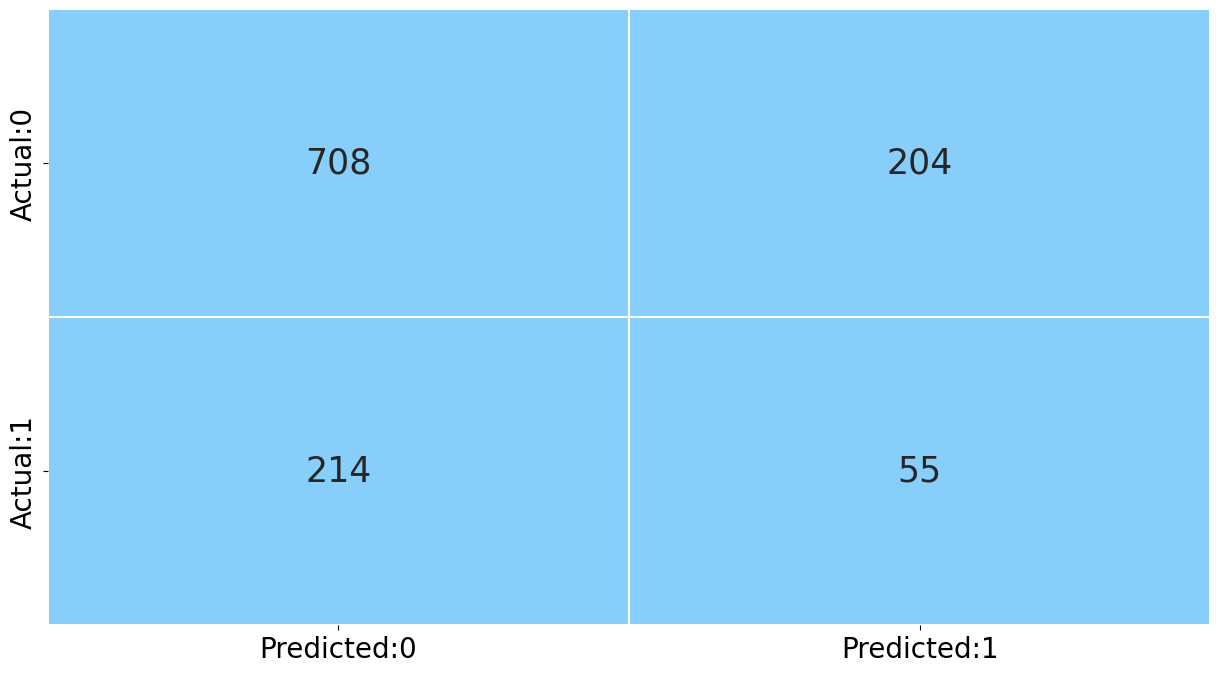

In [120]:
# call the function to plot the confusion matrix
# pass the 'svclassifier' to the function
plot_confusion_matrix(svclassifier)

In [121]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the 'svclassifier' to the function
test_report = get_test_report(svclassifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       912
           1       0.21      0.20      0.21       269

    accuracy                           0.65      1181
   macro avg       0.49      0.49      0.49      1181
weighted avg       0.64      0.65      0.64      1181



In [122]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the 'svclassifier' to the function
kappa_value = kappa_score(svclassifier)

# print the kappa value
print(kappa_value)

-0.0194785079694193


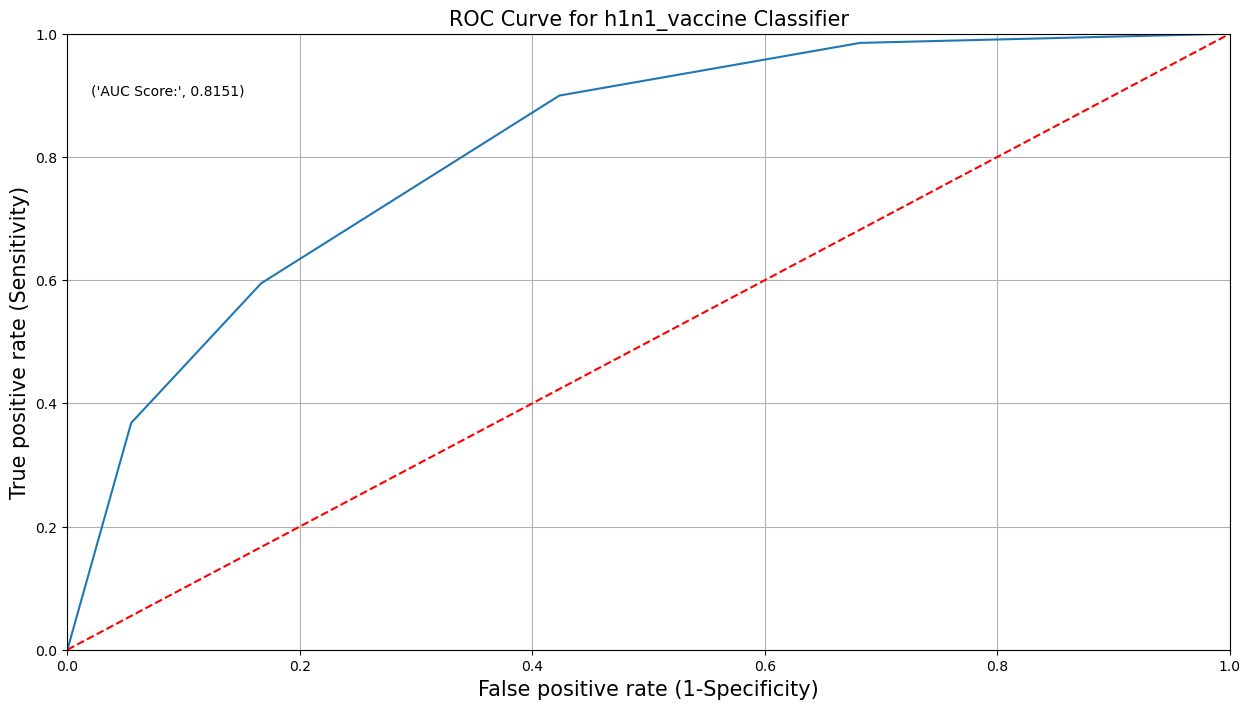

In [123]:
# call the function 'plot_roc' to plot the ROC curve
# pass the 'svclassifier' to the function
plot_roc(svclassifier)

In [124]:
# use the function 'update_score_card' to store the performance measures
# pass the 'svclassifier' as model name to the function
update_score_card(model_name = 'SVClassifier (Sigmoid)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333


## Support Vector Machine using Polynomial Kernal

In [125]:
# build the model
svclassifier = SVC(kernel='poly')
# fit the model
svclassifier.fit(x_train, y_train)

SVC(kernel='poly')

In [126]:
# predict the values
y_pred  = svclassifier.predict(x_test)

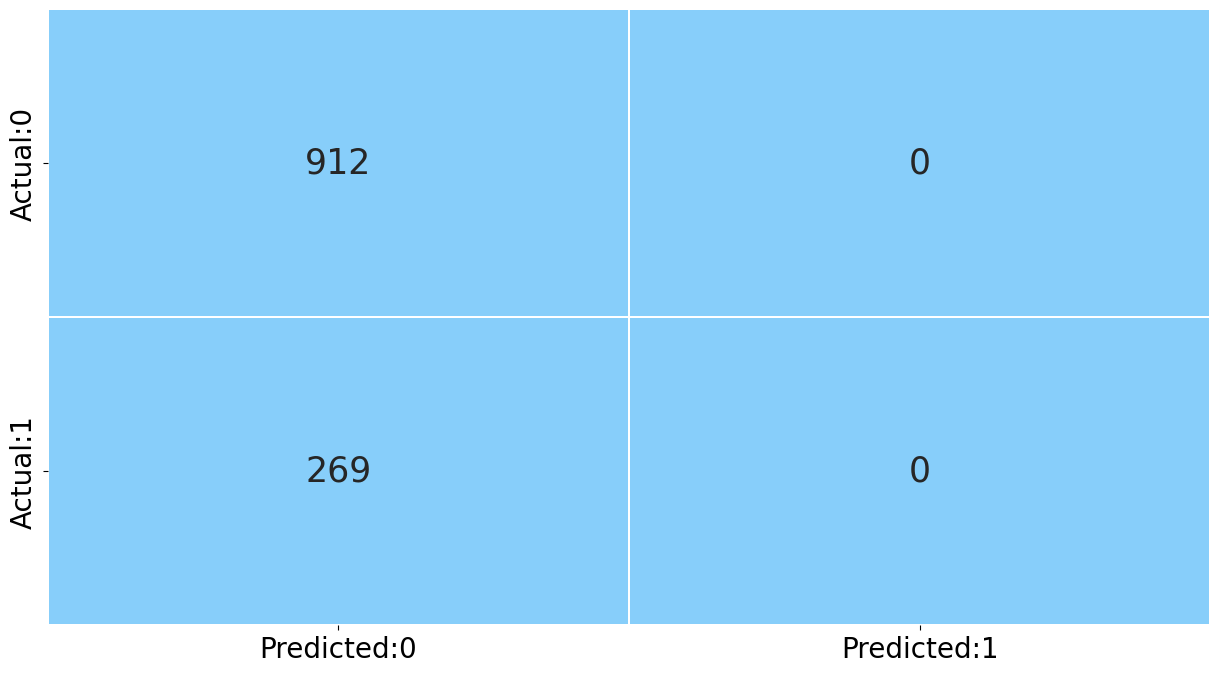

In [127]:
# call the function to plot the confusion matrix
# pass the 'svclassifier' to the function
plot_confusion_matrix(svclassifier)

In [128]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the 'svclassifier' to the function
test_report = get_test_report(svclassifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       912
           1       0.00      0.00      0.00       269

    accuracy                           0.77      1181
   macro avg       0.39      0.50      0.44      1181
weighted avg       0.60      0.77      0.67      1181



In [129]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the 'svclassifier' to the function
kappa_value = kappa_score(svclassifier)

# print the kappa value
print(kappa_value)

0.0


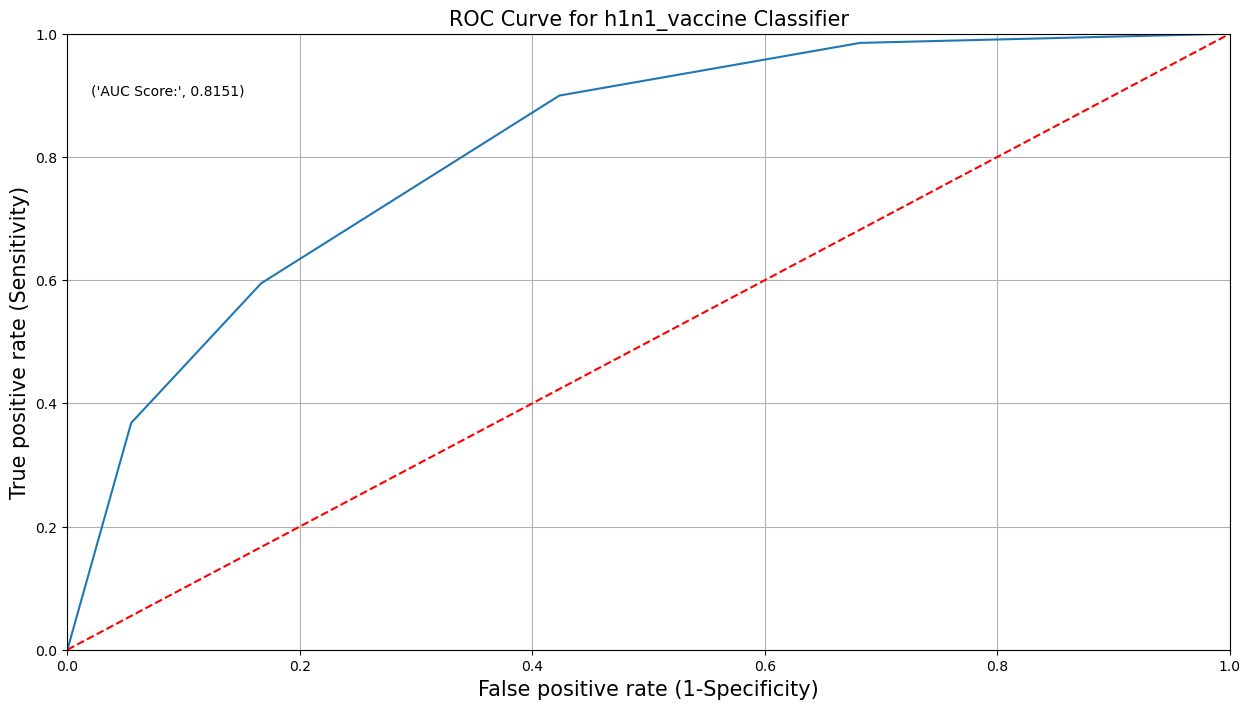

In [130]:
# call the function 'plot_roc' to plot the ROC curve
# pass the 'svclassifier' to the function
plot_roc(svclassifier)

In [131]:
# use the function 'update_score_card' to store the performance measures
# pass the 'svclassifier' as model name to the function
update_score_card(model_name = 'SVClassifier (Poly)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000


## Support Vector Machine using Polynomial Kernal with degree of polynomial = 2

In [132]:
# build the model
svclassifier_Poly = SVC(kernel='poly', degree = 2, gamma = 'auto')
# gamma : gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to
# exactly fit the training dataset
# fit the model
svclassifier_Poly.fit(x_train, y_train)

SVC(degree=2, gamma='auto', kernel='poly')

In [133]:
# predict the values
y_pred  = svclassifier_Poly.predict(x_test)

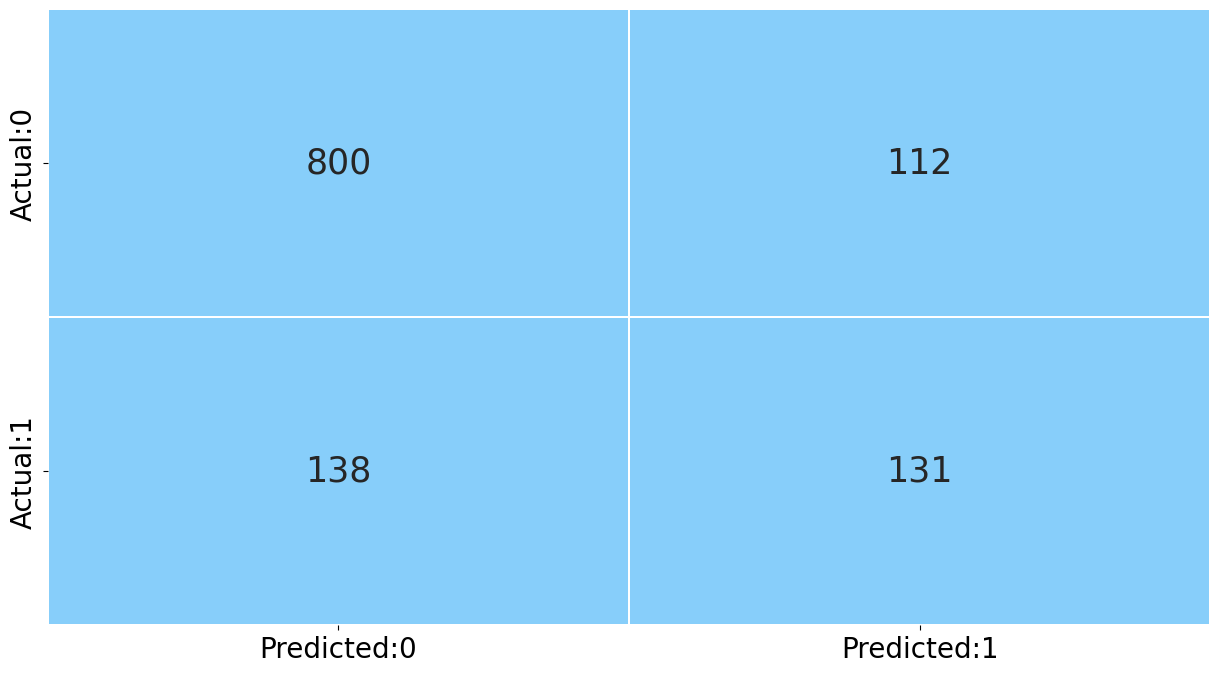

In [134]:
# call the function to plot the confusion matrix
# pass the 'svclassifier' to the function
plot_confusion_matrix(svclassifier)

In [135]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the 'svclassifier' to the function
test_report = get_test_report(svclassifier)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       912
           1       0.54      0.49      0.51       269

    accuracy                           0.79      1181
   macro avg       0.70      0.68      0.69      1181
weighted avg       0.78      0.79      0.78      1181



In [136]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the 'svclassifier' to the function
kappa_value = kappa_score(svclassifier)

# print the kappa value
print(kappa_value)

0.3770282188809506


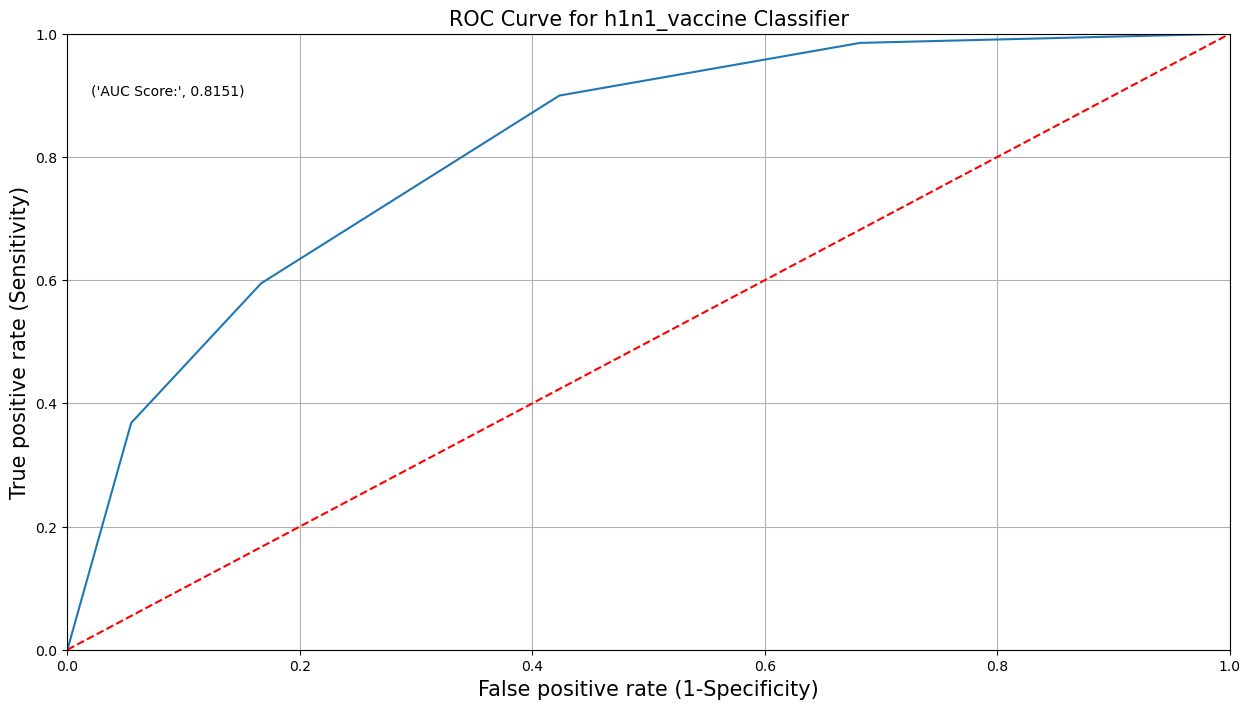

In [137]:
# call the function 'plot_roc' to plot the ROC curve
# pass the 'svclassifier' to the function
plot_roc(svclassifier)

In [138]:
# use the function 'update_score_card' to store the performance measures
# pass the 'svclassifier' as model name to the function
update_score_card(model_name = 'SVClassifier (Ploy Degree 2 kernal)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


# K Nearest Neighbors (KNN)

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.

In [139]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(x_train, y_train)

In [140]:
y_pred = knn_model.predict(x_test)

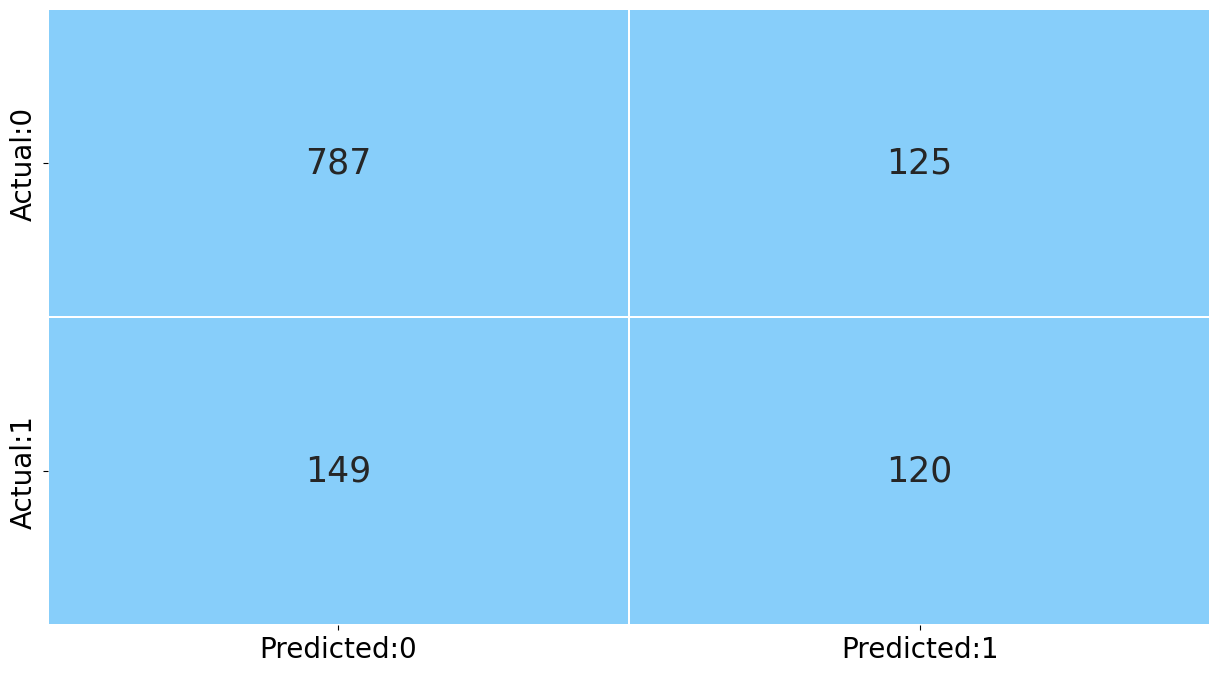

In [141]:
# call the function to plot the confusion matrix
# pass the knn model to the function
plot_confusion_matrix(knn_model)

In [142]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       912
           1       0.49      0.45      0.47       269

    accuracy                           0.77      1181
   macro avg       0.67      0.65      0.66      1181
weighted avg       0.76      0.77      0.76      1181



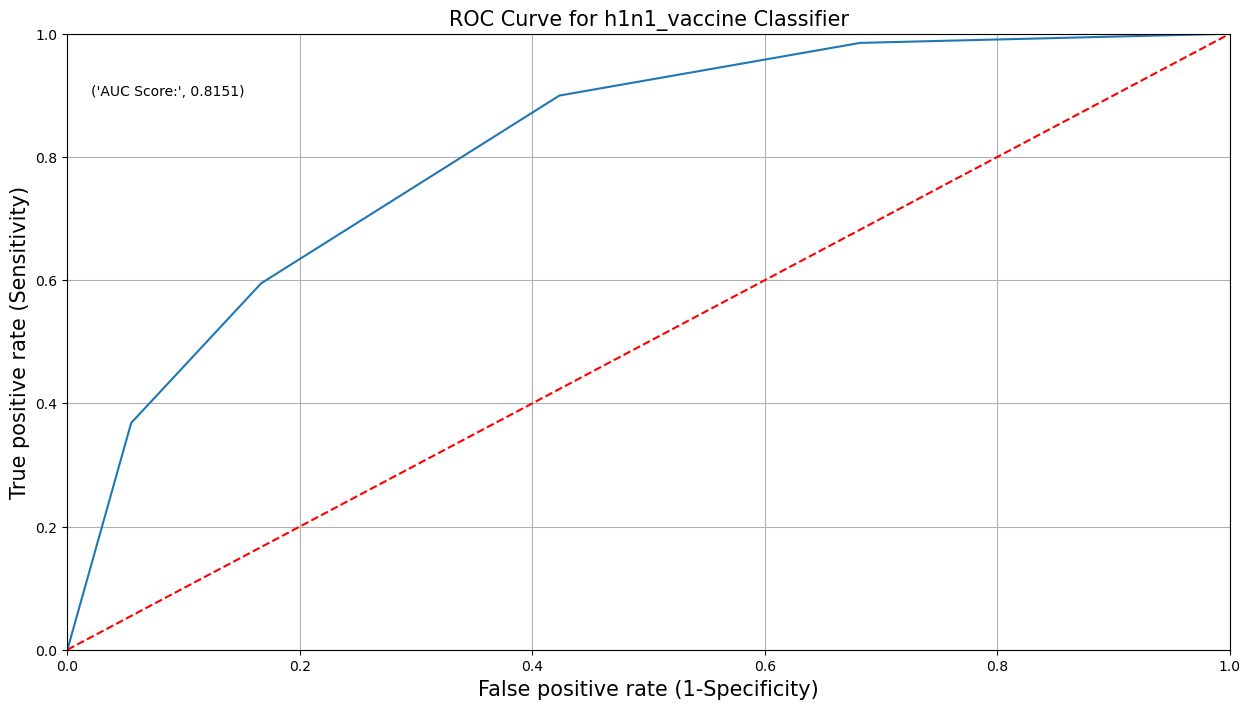

In [143]:
# call the function 'plot_roc' to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model)

In [144]:
# use the function 'update_score_card' to store the performance measures
# pass the 'KNN Classifier' as model name to the function
update_score_card(model_name = 'KNN Classifier')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


#  Optimal Value of K (using GridSearchCV)

In [145]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 19} 



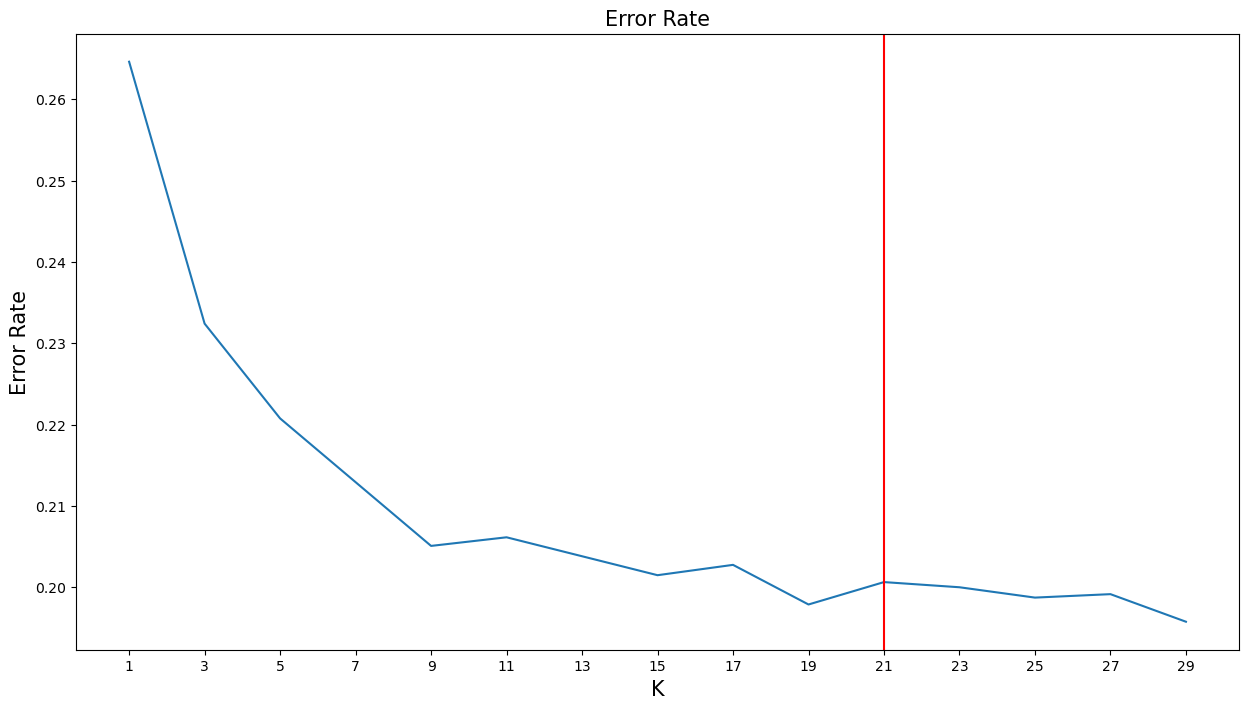

In [146]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,30,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, x_train, y_train, cv = 5)
      
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,30,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 30, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 21, color = 'red')

# display the plot
plt.show()

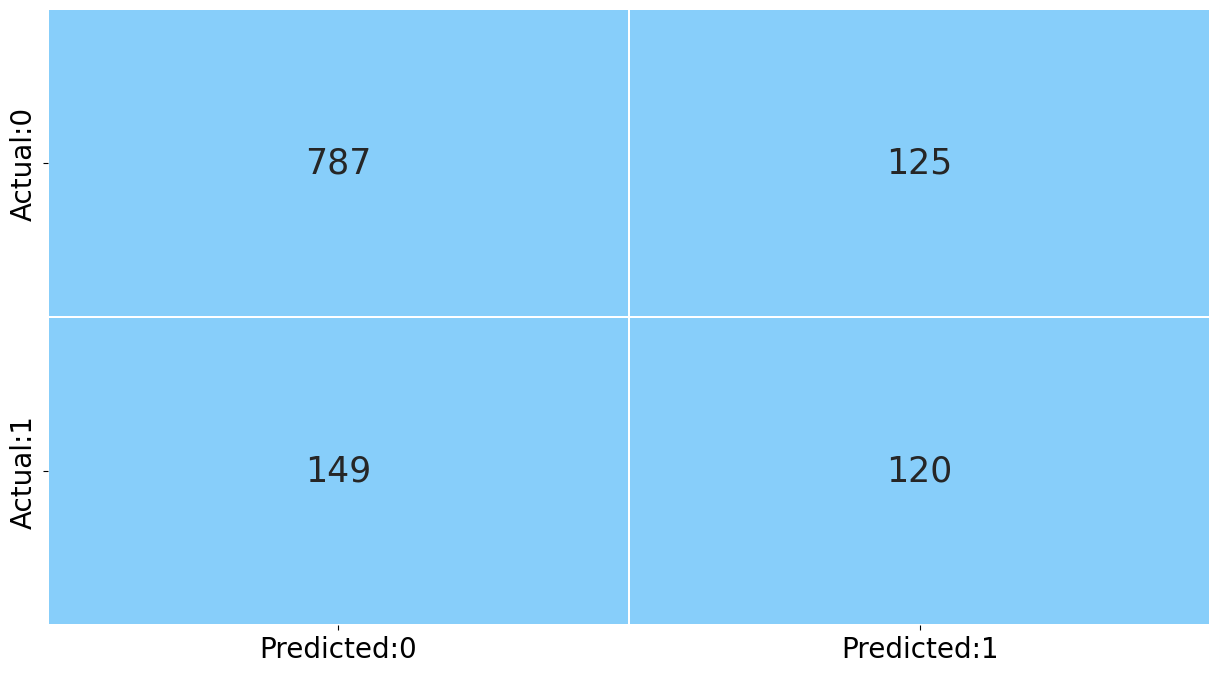

In [147]:
# call the function to plot the confusion matrix
# pass the knn grid model to the function
plot_confusion_matrix(knn_grid)

In [148]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the KNN grid model to the function
test_report = get_test_report(knn_grid)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       912
           1       0.49      0.45      0.47       269

    accuracy                           0.77      1181
   macro avg       0.67      0.65      0.66      1181
weighted avg       0.76      0.77      0.76      1181



In [149]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the knn grid to the function
kappa_value = kappa_score(knn_grid)

# print the kappa value
print(kappa_value)

0.3190705856606568


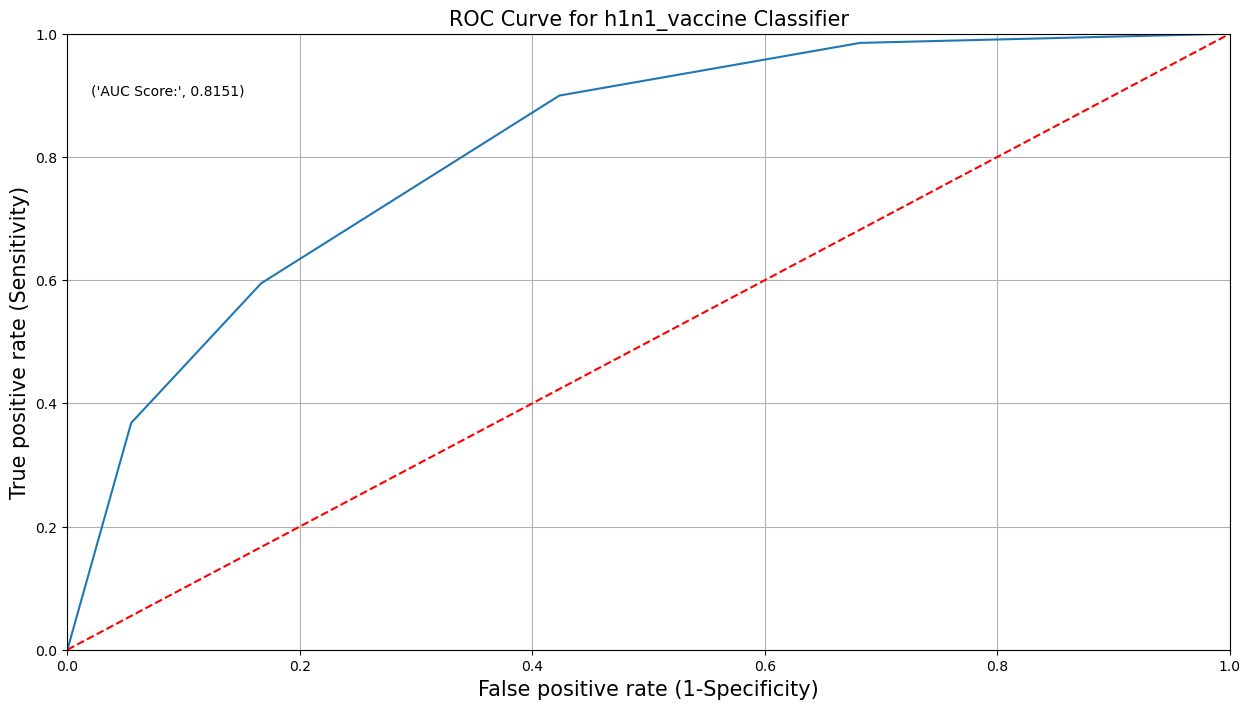

In [150]:
# call the function 'plot_roc' to plot the ROC curve
# pass the knn grid to the function
plot_roc(knn_grid)

In [151]:
# use the function 'update_score_card' to store the performance measures
# pass the 'KNN (Grid)' as model name to the function
update_score_card(model_name = 'KNN (Grid)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


# Ensemble Learning

# Random Forest

It is an example of the Bagging technique. It constructs multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees.

In [152]:
#intantiate the regressor
rf_cla = RandomForestClassifier(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_cla.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [153]:
# predict the values on test dataset using predict()
y_pred = rf_cla.predict(x_test)

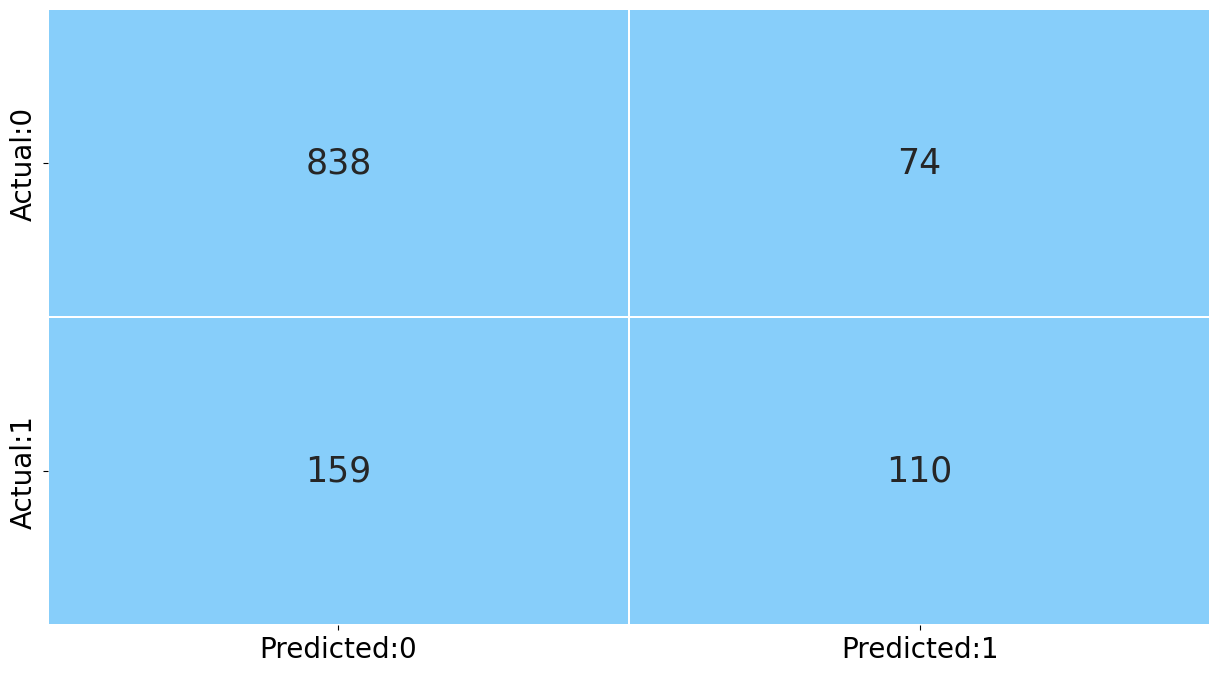

In [154]:
# call the function to plot the confusion matrix
# pass the Random forest rf_cla to the function

plot_confusion_matrix(rf_cla)

In [155]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the rf_cla to the function
kappa_value = kappa_score(rf_cla)

print(kappa_value)

0.3688707135992807


In [156]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Random forest rf_cla to the function
test_report = get_test_report(rf_cla)

print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       912
           1       0.60      0.41      0.49       269

    accuracy                           0.80      1181
   macro avg       0.72      0.66      0.68      1181
weighted avg       0.79      0.80      0.79      1181



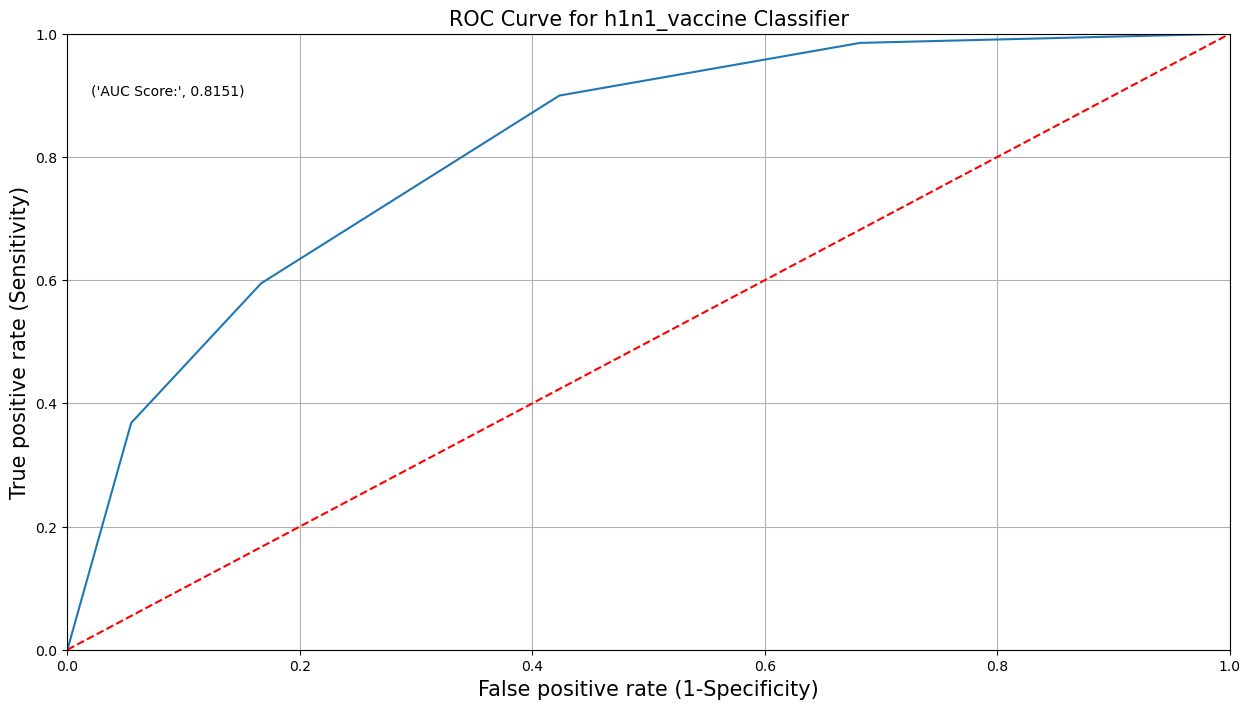

In [157]:
# call the function 'plot_roc' to plot the ROC curve
# pass the rf_cla to the function
plot_roc(rf_cla)

In [158]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Random Forest' as model name to the function
update_score_card(model_name = 'Random Forest')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


# Bagging meta-estimator

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets
of the original dataset and then aggregate their individual predictions (either by voting or by
averaging) to form a final prediction.Such a meta-estimator can typically be used as a way to reduce
the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its
construction procedure and then making an ensemble out of it.

In [159]:
# build the model
meta_estimator = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))

# fit the model
meta_estimator.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=10))

In [160]:
# predict the values
y_pred = meta_estimator.predict(x_test)

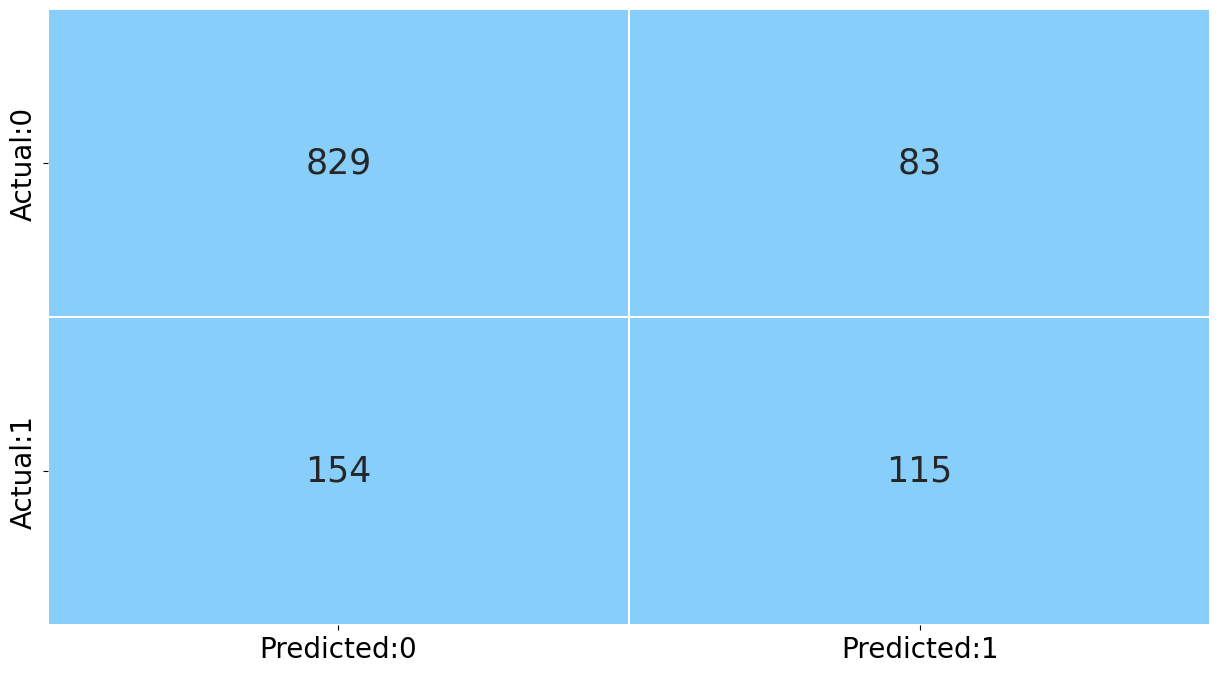

In [161]:
# call the function to plot the confusion matrix
# pass the Bagging meta - estimator to the function

plot_confusion_matrix(meta_estimator)

In [162]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the meta estimator to the function
kappa_value = kappa_score(meta_estimator)

print(kappa_value)

0.371022217827745


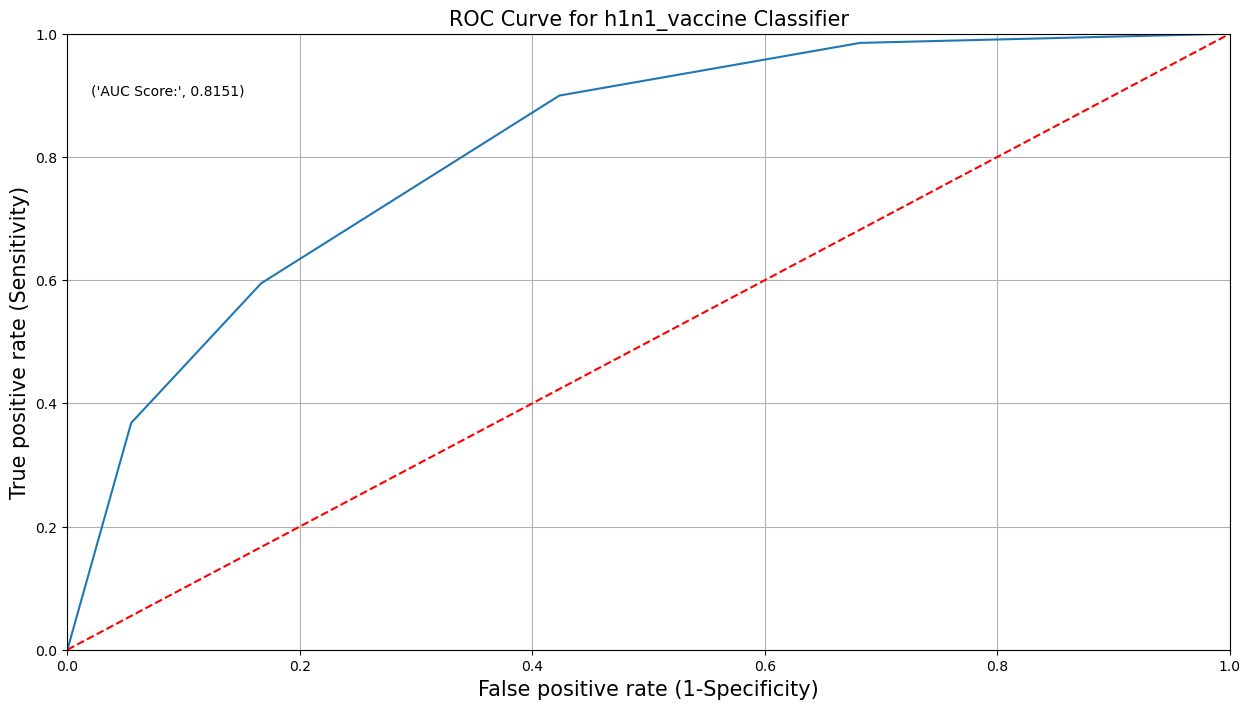

In [163]:
# call the function 'plot_roc' to plot the ROC curve
# pass the Bagging estimator to the function
plot_roc(meta_estimator)

In [164]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Bagging Meta Estimator' as model name to the function
update_score_card(model_name = 'Bagging Meta Estimator')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


# AdaBoost

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method
in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance,
with higher weights assigned to incorrectly classified instances.
What this algorithm does is that it builds a model and gives equal weights to all the data points.
It then assigns higher weights to points that are wrongly classified. Now all the points which have
higher weights are given more importance in the next model. It will keep training models until and
unless a lower error is received.

In [165]:
# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=10)

In [166]:
# predict the values
y_pred  = adaboost.predict(x_test)

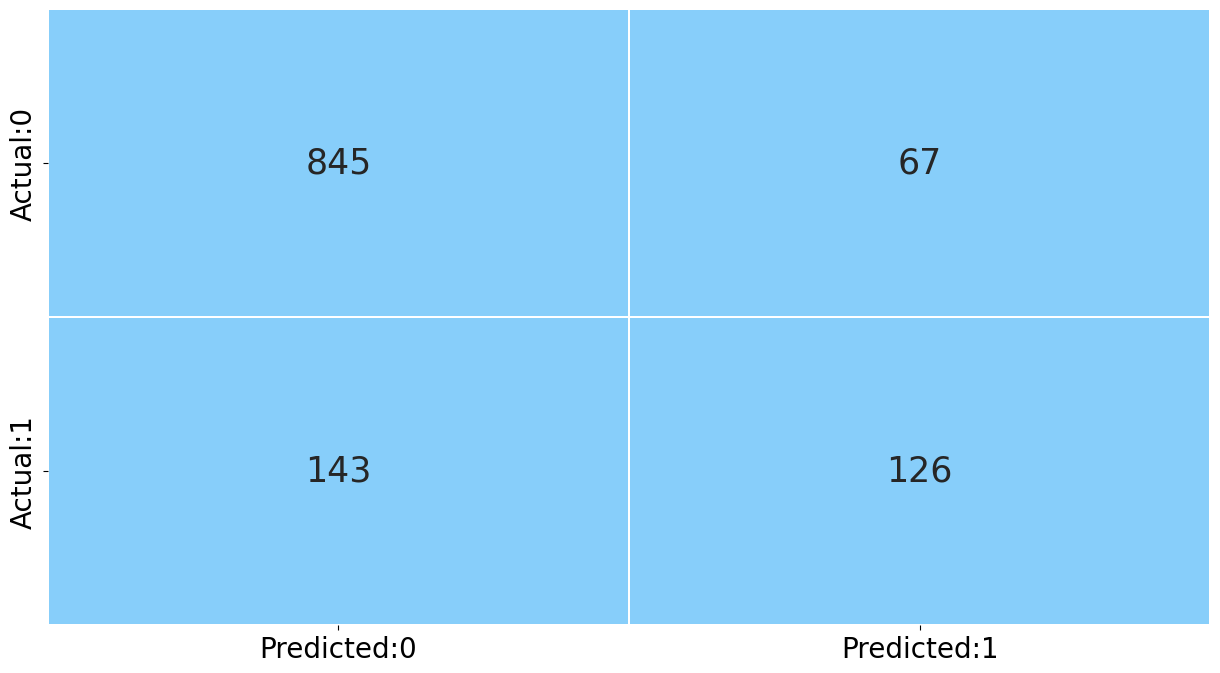

In [167]:
# call the function to plot the confusion matrix
# pass the AdaBoost estimator to the function

plot_confusion_matrix(adaboost)

In [168]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the Ada Booost to the function
kappa_value = kappa_score(adaboost)

print(kappa_value)

0.4386221445580233


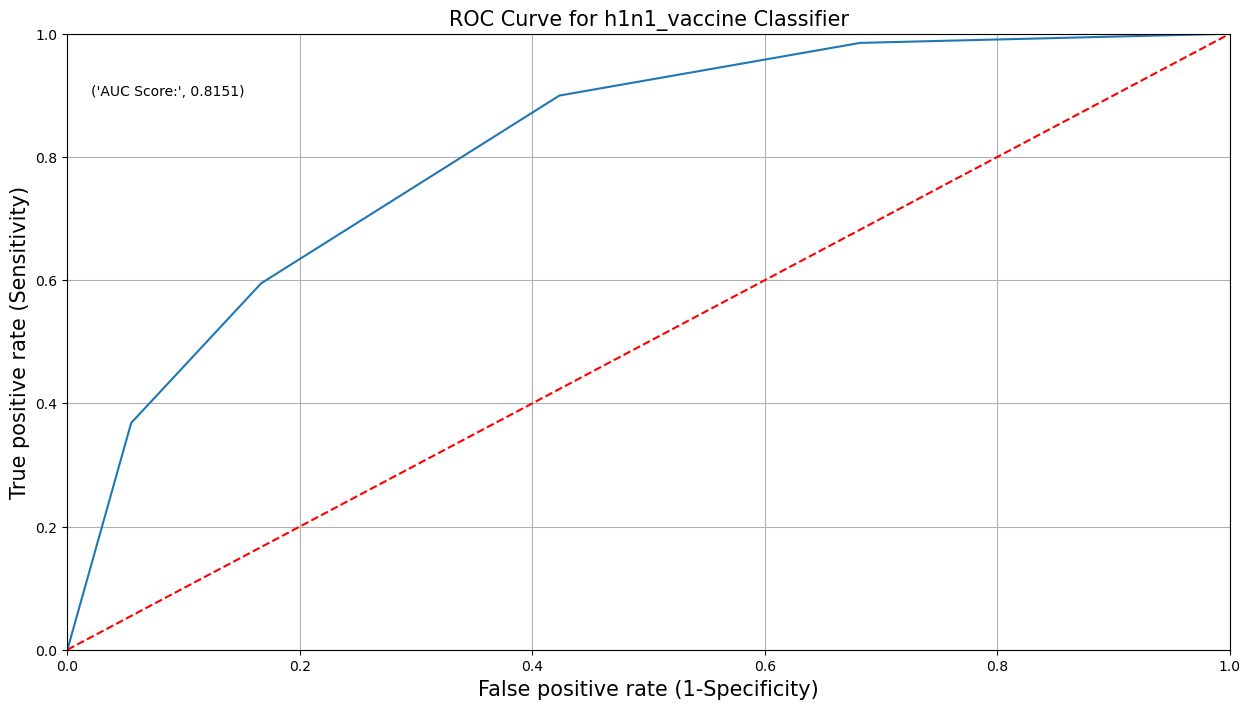

In [169]:
# call the function 'plot_roc' to plot the ROC curve
# pass the Ada Boost to the function
plot_roc(adaboost)

In [170]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Ada Boost' as model name to the function
update_score_card(model_name = 'Ada Boost')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


# XGBM

A Gradient Boosting Machine or GBM combines the predictions from multiple decision trees to generate
the final predictions. ... So, every successive decision tree is built on the errors of the previous
trees. This is how the trees in a gradient boosting machine algorithm are built sequentially.
Gradient boosting is a generalization of AdaBoosting, improving the performance of the approach and
introducing ideas from bootstrap aggregation to further improve the models, such as randomly sampling
the samples and features when fitting ensemble members.

In [171]:
# build the model
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
#Learning rate, simply means how fast the model learns.Each tree added modifies the overall model.
#The magnitude of the modification is controlled by learning rate. The lower the learning rate, the
#slower the model learns. The advantage of slower learning rate is that the model becomes more robust
#and efficient. In statistical learning, models that learn slowly perform better.

# fit the model
xgbm.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [172]:
# predict the values
y_pred = xgbm.predict(x_test)

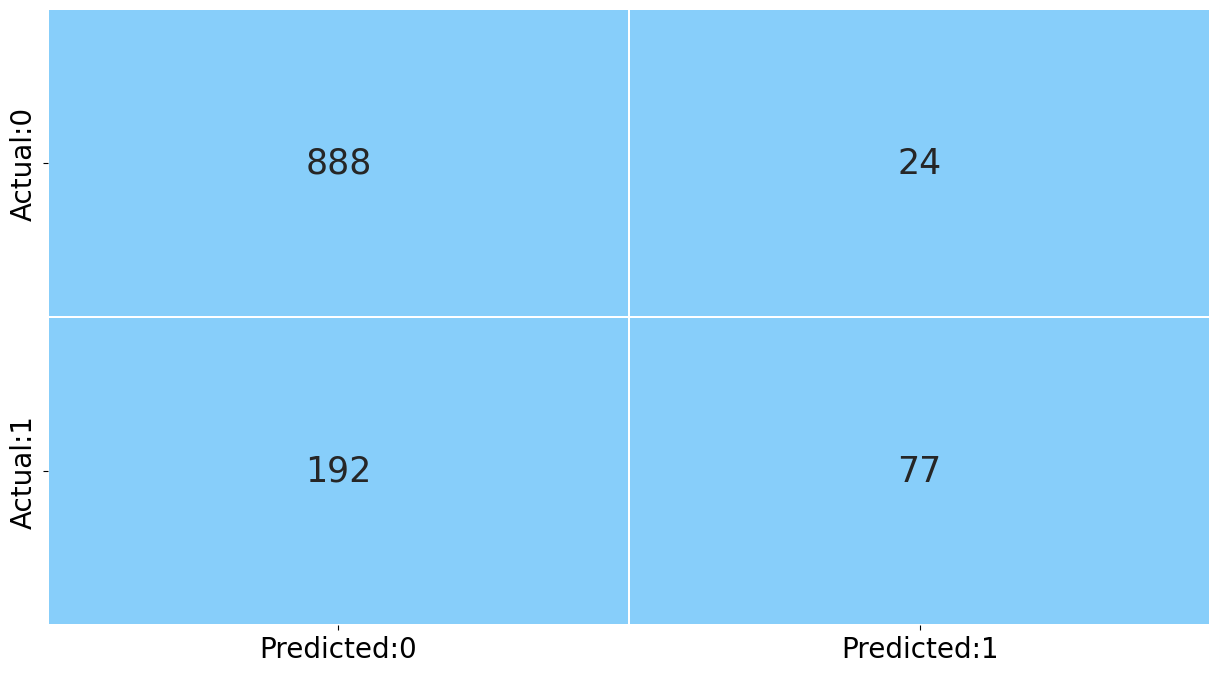

In [173]:
# call the function to plot the confusion matrix
# pass the Gradient Boosting Machine to the function

plot_confusion_matrix(xgbm)

In [174]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the Gradient Boosting Machine  to the function
kappa_value = kappa_score(xgbm)

print(kappa_value)

0.33331242551590046


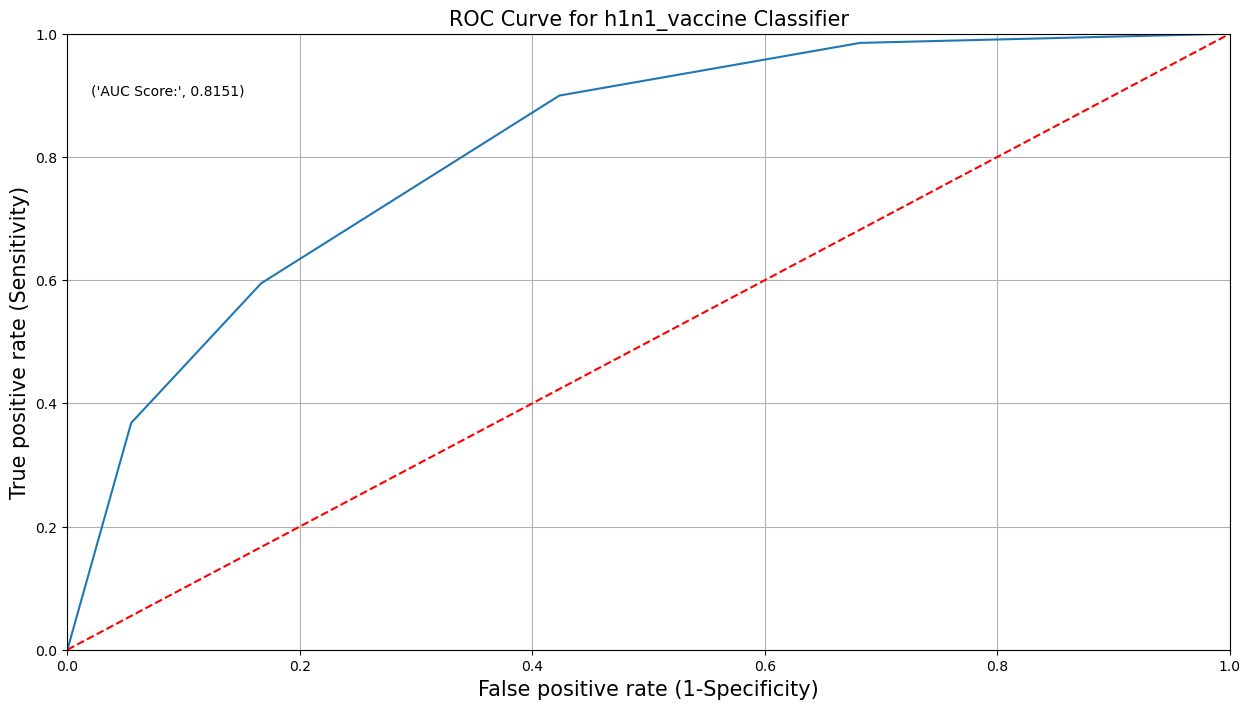

In [175]:
# call the function 'plot_roc' to plot the ROC curve
# pass the Gradient Boosting Machine to the function
plot_roc(xgbm)

In [176]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Gradient Boosting Machine' as model name to the function
update_score_card(model_name = 'XGBM (Gradient Boosting Machine)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regression,0.841824,0.656977,0.420074,0.817951,0.407135,0.512472
1,Logistic Regression (SGD),0.638938,0.582278,0.342007,0.794242,0.315539,0.430913
2,Decision Tree,0.669669,0.475177,0.498141,0.760373,0.330235,0.486388
3,Decision Tree (Prune),0.821091,0.625000,0.371747,0.806097,0.356945,0.466200
4,Decision Tree (GridSearchCV),0.815129,0.664430,0.368030,0.813717,0.371651,0.473684
5,SV Classifier (Linear),0.815129,0.662577,0.401487,0.817104,0.396220,0.500000
6,SV Classifier (Gaussian Kernal),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
7,SVClassifier (Sigmoid),0.815129,0.212355,0.204461,0.646063,-0.019479,0.208333
8,SVClassifier (Poly),0.815129,0.000000,0.000000,0.772227,0.000000,0.000000
9,SVClassifier (Ploy Degree 2 kernal),0.815129,0.539095,0.486989,0.788315,0.377028,0.511719


The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score.

From the above table the classification model after predicted using various features we can see that aacuracy score is almost same for all models except decision tree and there is some variation in AUC score, precision, recall, kappa and f1-score

We can say that Ada Boost, XGBM, Random Forest have the high accuracy score.

Let us plot the performance measures of the two models in the single graph

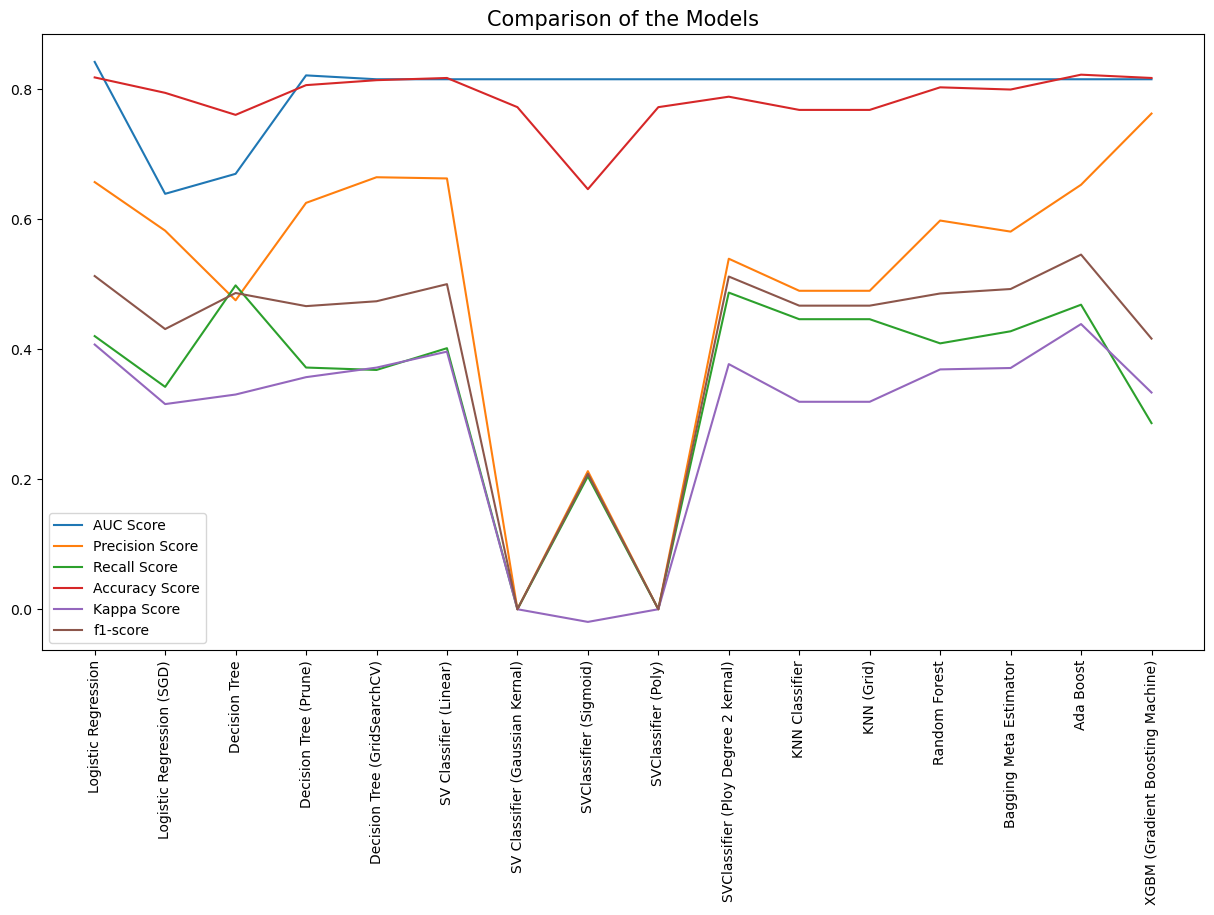

In [177]:
# plot the graph
# by default, plot() returns the line plot
score_card.plot()

# set the text size of the title
plt.title(label = 'Comparison of the Models', fontsize = 15)

# set the model names as x-ticks
# 'score_card.Model' retuns the model names
# rotate the x-axis labels vertically
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], list(score_card.Model), rotation = 'vertical')

# display the plot
plt.show()